In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category = DeprecationWarning)
warnings.filterwarnings("ignore", category = FutureWarning)
warnings.filterwarnings("ignore", category = UserWarning)
# preprocessing
import re
import string 
import itertools # for flattening

# nltk library
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize, regexp_tokenize, RegexpTokenizer
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk import FreqDist
from wordcloud import WordCloud
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.corpus import wordnet
from nltk import pos_tag
from nltk.util import ngrams
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder 
from langdetect import detect
from nltk.util import ngrams

from wordcloud import WordCloud

nltk.download('punkt', quiet=True)
nltk.download('stopwords')
nltk.download('words')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')

# sklearn library 
from sklearn.model_selection import train_test_split
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.manifold import TSNE
from sklearn.decomposition import NMF
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay, plot_roc_curve
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve, RocCurveDisplay
from sklearn.metrics import roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline

from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
import pyLDAvis.sklearn

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jocel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\jocel\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\jocel\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jocel\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\jocel\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
C:\Users\jocel\anaconda3\lib\site-packages\past\builtins\misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's docu

In [2]:
df = pd.read_csv("tweet_emotions.csv")
pd.set_option('display.max_colwidth', None)
df.head(20)

tweet_id   sentiment  \
0   1956967341       empty   
1   1956967666     sadness   
2   1956967696     sadness   
3   1956967789  enthusiasm   
4   1956968416     neutral   
5   1956968477       worry   
6   1956968487     sadness   
7   1956968636       worry   
8   1956969035     sadness   
9   1956969172     sadness   
10  1956969456     neutral   
11  1956969531       worry   
12  1956970047     sadness   
13  1956970424     sadness   
14  1956970860    surprise   
15  1956971077     sadness   
16  1956971170        love   
17  1956971206     sadness   
18  1956971473       worry   
19  1956971586     sadness   

                                                                                                                                       content  
0                                                 @tiffanylue i know  i was listenin to bad habit earlier and i started freakin at his part =[  
1                                                                                 Layin n bed with a headache  ughhhh...waitin on your call...  
2                                                                                                          Funeral ceremony...gloomy friday...  
3                                                                                                         wants to hang out with friends SOON!  
4                                                       @dannycastillo We want to trade with someone who has Houston tickets, but no one will.  
5                                                         Re-pinging @ghostridah14: why didn't you go to prom? BC my bf didn't like my friends  
6         I should be sleep, but im not! thinking about an old friend who I want. but he's married now. damn, &amp; he wants me 2! scandalous!  
7                                                                                                         Hmmm. http://www.djhero.com/ is down  
8                                                                                                      @charviray Charlene my love. I miss you  
9                                                                                                   @kelcouch I'm sorry  at least it's Friday?  
10                                                                                                                            cant fall asleep  
11                                                                                                                     Choked on her retainers  
12                                                                              Ugh! I have to beat this stupid song to get to the next  rude!  
13  @BrodyJenner if u watch the hills in london u will realise what tourture it is because were weeks and weeks late  i just watch itonlinelol  
14                                                                                                                                Got the news  
15                                                                                               The storm is here and the electricity is gone  
16                                                                                                                        @annarosekerr agreed  
17                                                                             So sleepy again and it's not even that late. I fail once again.  
18                                              @PerezHilton lady gaga tweeted about not being impressed by her video leaking just so you know  
19                  How are YOU convinced that I have always wanted you? What signals did I give off...damn I think I just lost another friend

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   40000 non-null  int64 
 1   sentiment  40000 non-null  object
 2   content    40000 non-null  object
dtypes: int64(1), object(2)
memory usage: 937.6+ KB


In [4]:
# description of categorical columns
df.describe(include = "object")

sentiment  \
count      40000   
unique        13   
top      neutral   
freq        8638   

                                                                                                             content  
count                                                                                                          40000  
unique                                                                                                         39827  
top     I just received a mothers day card from my lovely daughter wishing my a happy mothers day  http://tr.im/kWK9  
freq                                                                                                              14

In [5]:
# checking for nan values
df.isna().sum()

tweet_id     0
sentiment    0
content      0
dtype: int64

In [6]:
# checking value counts for each sentiment
df["sentiment"].value_counts()

neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: sentiment, dtype: int64

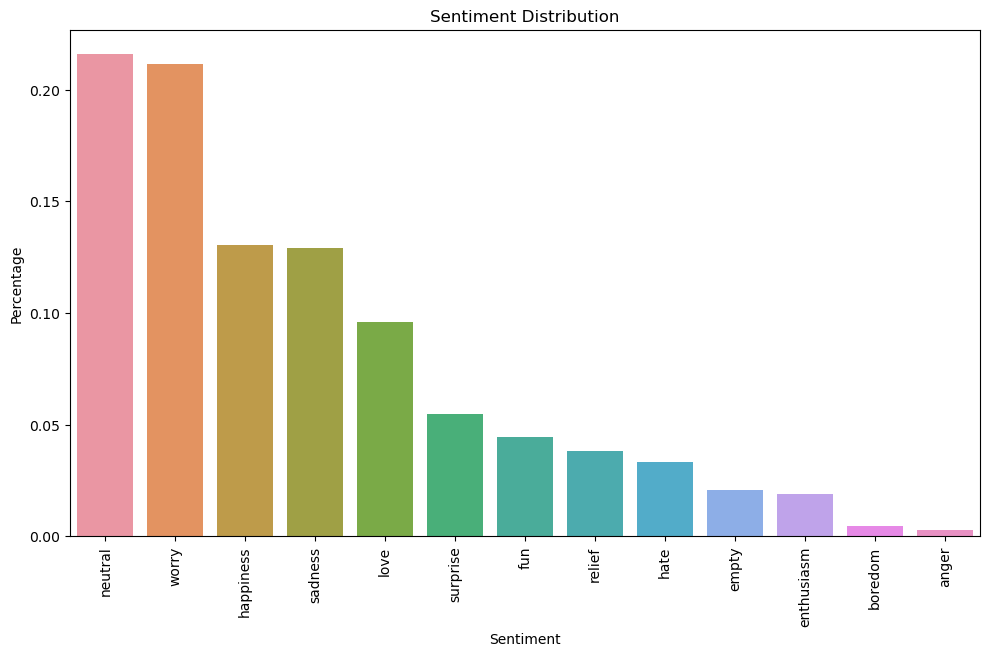

In [7]:
# distribution of sentiments
sentiments = df["sentiment"].value_counts(normalize = True).reset_index()
sentiments = sentiments.rename(columns = {"index": "sentiment", "sentiment": "percentage"})

fig, ax = plt.subplots(figsize = (10, 6))
sns.barplot(data = sentiments, x = "sentiment", y = "percentage")
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Percentage")
plt.tight_layout()
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.show();

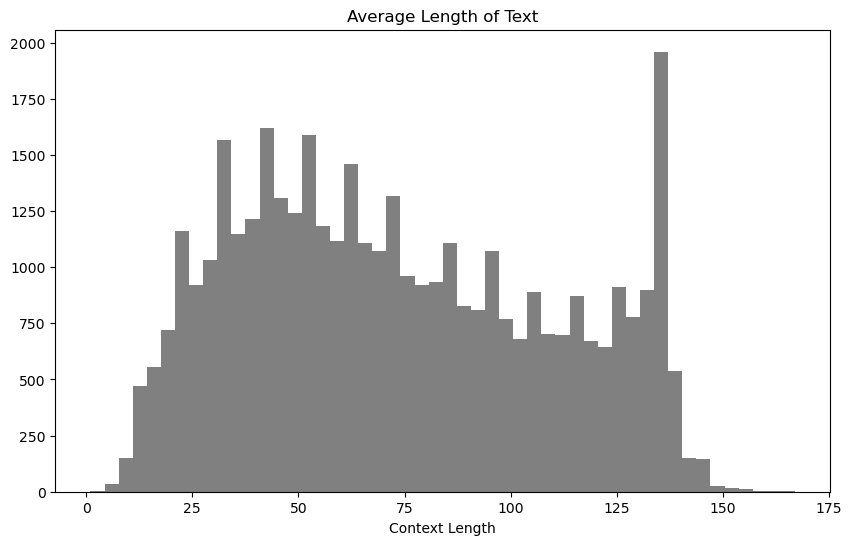

In [8]:
# checking average length of tweets
length_of_tweets = df["content"].apply(lambda x: len(x))

fig, ax = plt.subplots(figsize = (10, 6))
plt.hist(length_of_tweets, color = "gray", bins = 50)
plt.title("Average Length of Text")
plt.xlabel("Context Length")
plt.show();

In [9]:
# inspecting neutral comments 
neutral = df.loc[df["sentiment"] == "neutral"]
neutral

tweet_id sentiment  \
4      1956968416   neutral   
10     1956969456   neutral   
22     1956972116   neutral   
31     1956975441   neutral   
32     1956975860   neutral   
...           ...       ...   
39990  1753918829   neutral   
39991  1753918846   neutral   
39992  1753918881   neutral   
39993  1753918892   neutral   
39995  1753918954   neutral   

                                                                                                                        content  
4                                        @dannycastillo We want to trade with someone who has Houston tickets, but no one will.  
10                                                                                                             cant fall asleep  
22     No Topic Maps talks at the Balisage Markup Conference 2009   Program online at http://tr.im/mL6Z (via @bobdc) #topicmaps  
31                                                                                                    @cynthia_123 i cant sleep  
32                                                                                              I missed the bl***y bus!!!!!!!!  
...                                                                                                                         ...  
39990                                                             @shonali I think the lesson of the day is not to have luggage  
39991                                                       @lovelylisaj can you give me the link for the kimba diaries please?  
39992    @jasimmo Ooo showing of your French skills!! lol Things good over here. Lovely weather, so should be outside  How's u?  
39993              @sendsome2me haha, yeah. Twitter has many uses. For me it's just to know what the ppl i care about are doing  
39995                                                                                                          @JohnLloydTaylor  

[8638 rows x 3 columns]

In [10]:
# inspecting worry comments
worry = df.loc[df["sentiment"] == "worry"]
worry

tweet_id sentiment  \
5      1956968477     worry   
7      1956968636     worry   
11     1956969531     worry   
18     1956971473     worry   
20     1956971981     worry   
...           ...       ...   
39936  1753903426     worry   
39938  1753903505     worry   
39941  1753903578     worry   
39956  1753903987     worry   
39978  1753904868     worry   

                                                                                                                        content  
5                                          Re-pinging @ghostridah14: why didn't you go to prom? BC my bf didn't like my friends  
7                                                                                          Hmmm. http://www.djhero.com/ is down  
11                                                                                                      Choked on her retainers  
18                               @PerezHilton lady gaga tweeted about not being impressed by her video leaking just so you know  
20                                       @raaaaaaek oh too bad! I hope it gets better. I've been having sleep issues lately too  
...                                                                                                                         ...  
39936                        tomorrow is going to be sooo awkward &amp; embarassing. lights &amp; sounds last night was awesome  
39938         @icebergstorm hey! negative on the primatech, this handle's been on the tubes for a decade longer than heroes has  
39941  @PH7S sure. But be careful also of making statements that we don't do it. Parallel ideas do happen. I've seen it myself.  
39956                                                                                        How Do You Sleep - Jesse McCartney  
39978      @givemestrength bloody Feds, they lost last statement and r hounding me for another one. I dodged them one last week  

[8459 rows x 3 columns]

In [11]:
# inspecting happy comments 
happiness = df.loc[df["sentiment"] == "happiness"]
happiness

tweet_id  sentiment  \
40     1956977084  happiness   
69     1956983874  happiness   
77     1956985535  happiness   
126    1956996765  happiness   
233    1957017522  happiness   
...           ...        ...   
39986  1753905153  happiness   
39987  1753918809  happiness   
39988  1753918818  happiness   
39994  1753918900  happiness   
39998  1753919043  happiness   

                                                                                                                                      content  
40                                                                    mmm much better day... so far! it's still quite early. last day of #uds  
69                      So great to see Oin &amp; Cynthia.  So happy.  Dinner was great, cute little place.  Too bad Oin got sick afterwards.  
77                                                   @havingmysay  dude, that is my favorite sandwich place ever. ummm did you take PICTURES?  
126    Need to pack for CALI CALI! Cannot waittt! Thinking a glass of wine is in order to celebrate my weekend vaca. Still work 2morrow, tho.  
233    took a math test today. The day before the test, the teacher says bring your calculator. Luke was confident. Teacher decided no calcs.  
...                                                                                                                                       ...  
39986                                                                                 going to watch boy in the striped pj's hope i don't cry  
39987                                               gave the bikes a thorough wash, degrease it and grease it. think i did a really good job!  
39988                                                                             had SUCH and AMAZING time last night, McFly were INCREDIBLE  
39994                                                                                                           Succesfully following Tayla!!  
39998              @niariley WASSUP BEAUTIFUL!!! FOLLOW ME!!  PEEP OUT MY NEW HIT SINGLES WWW.MYSPACE.COM/IPSOHOT I DEF. WAT U IN THE VIDEO!!  

[5209 rows x 3 columns]

In [12]:
# inspecting sad comments
sadness = df.loc[df["sentiment"] == "sadness"]
sadness

tweet_id sentiment  \
1      1956967666   sadness   
2      1956967696   sadness   
6      1956968487   sadness   
8      1956969035   sadness   
9      1956969172   sadness   
...           ...       ...   
39882  1753887579   sadness   
39894  1753902385   sadness   
39909  1753902771   sadness   
39939  1753903509   sadness   
39965  1753904398   sadness   

                                                                                                                                    content  
1                                                                              Layin n bed with a headache  ughhhh...waitin on your call...  
2                                                                                                       Funeral ceremony...gloomy friday...  
6      I should be sleep, but im not! thinking about an old friend who I want. but he's married now. damn, &amp; he wants me 2! scandalous!  
8                                                                                                   @charviray Charlene my love. I miss you  
9                                                                                                @kelcouch I'm sorry  at least it's Friday?  
...                                                                                                                                     ...  
39882                                                                                         Heaps keen for next weekend.     Mummy. &lt;3  
39894                                        @renagades Have a great day..... if the rain keeps up I may go swimming instead of dining here  
39909                                                        @Ssisch Hmmm... Sisch &amp; sound design. So when you say soon, you mean weeks  
39939                                                                               @watermelon39 haha! And Twitter! Hard though isn't it?!  
39965                                                                                                            is heading off to the fair  

[5165 rows x 3 columns]

In [13]:
# inspecting love comments
love = df.loc[df["sentiment"] == "love"]
love

tweet_id sentiment  \
16     1956971170      love   
94     1956989093      love   
122    1956996385      love   
131    1956998370      love   
151    1957002773      love   
...           ...       ...   
39974  1753904674      love   
39989  1753918822      love   
39996  1753919001      love   
39997  1753919005      love   
39999  1753919049      love   

                                                                                                                                    content  
16                                                                                                                     @annarosekerr agreed  
94                 @RobertF3 correct! I ADORE him. I just plucked him up and put him under my arm cuz he was cryin.  All better now! Hahaha  
122                   @freepbx sounds good. Appreciate the suggestion. Been a week now and we're still offline  Time to ask for a refund...  
131                                           Pats in philly at 2 am. I love it. Mmm cheesesteak.  Miss my boyfriend   but I love vacation.  
151                                                       @NisforNeemah thanks neemah. I'm gonna be soooo close to you and izzy, yet so far  
...                                                                                                                                     ...  
39974                                         to my pretty lady @nikkiwoods HAPPY MOTHER'S DAY!!! She's the mother of my future son-in-laws  
39989   His snoring is so annoying n it keeps me from sleeping (like right now, lol) but I honestly wud miss it if it eva left  I love him.  
39996                                                                                                        Happy Mothers Day  All my love  
39997           Happy Mother's Day to all the mommies out there, be you woman or man as long as you're 'momma' to someone this is your day!  
39999  @mopedronin bullet train from tokyo    the gf and i have been visiting japan since thursday  vacation/sightseeing    gaijin godzilla  

[3842 rows x 3 columns]

In [14]:
# inspecting surprise comments
surprise = df.loc[df["sentiment"] == "surprise"]
surprise

tweet_id sentiment  \
14     1956970860  surprise   
164    1957005410  surprise   
189    1957008434  surprise   
190    1957008478  surprise   
192    1957008766  surprise   
...           ...       ...   
39947  1753903784  surprise   
39954  1753903927  surprise   
39977  1753904799  surprise   
39979  1753904911  surprise   
39984  1753905113  surprise   

                                                                               content  
14                                                                        Got the news  
164      2 days of this month left, and I only have 400MB left on my onpeak downloads.  
189                      @Bern_morley where are you? In Bris? I can't hear any thunder  
190       bec vs fat food   --- winner = fat food  but not this weeknend, ill beat it!  
192    I had a dream about a pretty pretty beach and there was no beach when I woke up  
...                                                                                ...  
39947                                    @MancunianLee Oh aye.....he rocks, shes horny  
39954                                                         today was interesting...  
39977                                                      @BuddingGenius you dont say  
39979                                             @prinsezha awesome. Wha'dya get her?  
39984                                                    @iscreamshinki Oh that's why.  

[2187 rows x 3 columns]

In [15]:
# inspecting fun comments
fun = df.loc[df["sentiment"] == "fun"]
fun

tweet_id sentiment  \
21     1956972097       fun   
41     1956977187       fun   
148    1957001854       fun   
165    1957005696       fun   
179    1957007268       fun   
...           ...       ...   
39881  1753887552       fun   
39897  1753902467       fun   
39930  1753903288       fun   
39931  1753903294       fun   
39973  1753904668       fun   

                                                                                                                                   content  
21               Wondering why I'm awake at 7am,writing a new song,plotting my evil secret plots muahahaha...oh damn it,not secret anymore  
41     @DavidArchie &lt;3 your gonna be the first  twitter ;) cause your amazing lol. come to canada  would do anything to see you perform  
148                                                                                       RIP leonardo. You were a great mini fiddler crab  
165                                                                      @IdleThumbs Up is out?  I didn't get the memo   It looks amazing.  
179                               @relly1  OMG Ur alive!!! LOL  2day has gone sooo slow  I'm going insane Grrr You doing anything tonight?  
...                                                                                                                                    ...  
39881                                                                                          @hernameisnicki is it? :O im gonna get that  
39897                                  From Hyderabad Blues 2, on mimicking the American accent: You won't be an ass if you roll your R's.  
39930                                         8:30PM... it has just hit me i have school tomorrow :O ahaha! I'll stay on til 9 i think  Xx  
39931                            on a sunny walk round the lake this morning we met a mother goose and father goose and five baby goslings  
39973                                                                                good morning/midday nation!  FORMULA ONE IN ONE HOUR!  

[1776 rows x 3 columns]

In [16]:
# inspecting relief comments
relief = df.loc[df["sentiment"] == "relief"]
relief

tweet_id sentiment  \
147    1957001506    relief   
215    1957014389    relief   
312    1957037860    relief   
380    1957053409    relief   
406    1957062621    relief   
...           ...       ...   
39811  1753885049    relief   
39818  1753885345    relief   
39843  1753886145    relief   
39917  1753903055    relief   
39959  1753904145    relief   

                                                                                                                                       content  
147                                                                                                                                I'm at work  
215    is done painting all the bedroom furniture, I still have to do the table but it will wait until after the move. Uggh moving in the heat  
312                     Scary lightning and thunder  I'm glad it's over now. Going to sleep, I hope I'm not late to school tomorow again. Haha  
380                                                                                                             is home.  safely... but hungry  
406                                                              just finished 8 hours of Texas Life Insurance CE tonight, 22 more hours to go  
...                                                                                                                                        ...  
39811  Morning all, finally got to stream media from PC to PS3 via wireless router, much easier than using a USB dongle, ah, techy simplicity.  
39818                      juz donated books/mags 4 charity. Not only do I feel good but it gave me a good workout from all that heavy lifting  
39843                                                                                                     @halia Smile. Everything worked out.  
39917                                               Assignment actually looking pretty decent....so glad I changed my topic at the last minute  
39959                  Gooood party last night (: Although I am extremely tired now. xD Off to bed to lounge around watch tv and sleep all day  

[1526 rows x 3 columns]

In [17]:
# inspecting hate comments
hate = df.loc[df["sentiment"] == "hate"]
hate

tweet_id sentiment  \
30     1956974706      hate   
86     1956987600      hate   
99     1956989601      hate   
101    1956990288      hate   
105    1956991009      hate   
...           ...       ...   
39504  1753836085      hate   
39614  1753852149      hate   
39624  1753852695      hate   
39759  1753870819      hate   
39907  1753902748      hate   

                                                                                                                                        content  
30                                                         It is so annoying when she starts typing on her computer in the middle of the night!  
86     dammit! hulu desktop has totally screwed up my ability to talk to a particular port on one of our dev servers. so i can't watch and code  
99                                 @ cayogial i wanted to come to BZ this summer :/ not so sure anymore... a teacher's life in the summer SUCKS  
101                                                                                                         @mrgenius23 You win ... SIGH Rakeem  
105                                                                                                               @soviet_star Damn, that sucks  
...                                                                                                                                         ...  
39504                                             @GeminiAngel24 lol, my current mp3 player is a brick. It would be nice to have something slim  
39614                                                                                            @Rove1974 LOL @ the cards. So very, very wrong  
39624                                                                                                                    @cristinica21 kill her  
39759                          @n00rtje Thanks  I'll explain on msn or something :p and I HATE SPIDERS TOO! What happened, one attacked you? xD  
39907                                                          @sophieamy yer, oh that's gay cause u hell need to post more haha so we can talk  

[1323 rows x 3 columns]

In [18]:
# inspecting empty comments
empty = df.loc[df["sentiment"] == "empty"]
empty

tweet_id sentiment  \
0      1956967341     empty   
44     1956978276     empty   
52     1956979917     empty   
141    1957000336     empty   
180    1957007357     empty   
...           ...       ...   
39702  1753868848     empty   
39742  1753870123     empty   
39749  1753870555     empty   
39845  1753886183     empty   
39975  1753904682     empty   

                                                                                                                         content  
0                                   @tiffanylue i know  i was listenin to bad habit earlier and i started freakin at his part =[  
44          @creyes middle school and elem. High schools will remain open for those who need credits to graduate. Cali is broken  
52                                                                                       @djmicdamn hey yu lil fucker i textd yu  
141                                      @softtouchme just answered you- never learned how to write in French- just basic stuff-  
180                                                                                Have a headache  I'm going to bed. Goodnight!  
...                                                                                                                          ...  
39702                                                            Here we go again, back to work. Happy Mothers Day to all  Peace  
39742  @PhilippaJane the &quot;no pants&quot; idea could be the new attempt world-wide to attract business back to the airlines.  
39749                                                                                                          @sloanyxxx Thanks  
39845                                                                                           @xxxRobyn Yeah *fingers crossed*  
39975                                                                            @lexia Or even listen to Susan's green policies  

[827 rows x 3 columns]

In [19]:
# inspecting enthusiastic comments
enthusiasm = df.loc[df["sentiment"] == "enthusiasm"]
enthusiasm

tweet_id   sentiment  \
3      1956967789  enthusiasm   
56     1956981427  enthusiasm   
422    1957066701  enthusiasm   
424    1957067779  enthusiasm   
444    1957073668  enthusiasm   
...           ...         ...   
39906  1753902732  enthusiasm   
39910  1753902785  enthusiasm   
39948  1753903793  enthusiasm   
39957  1753904028  enthusiasm   
39971  1753904526  enthusiasm   

                                                                                                                                      content  
3                                                                                                        wants to hang out with friends SOON!  
56     bed...sorta. today was good, sara has strep thought Angelina does to; i shared a water with her B4 they told me, i will prob get it to  
422                                                                                                                       I want another tatt  
424                                                                                                So, I need to make a lot of money tomorrow  
444              @lilxamyx08 i know ridiculous! we never got to hang out  i love chicago and want to go shopping... so a trip sounds like fun  
...                                                                                                                                       ...  
39906                                                                                       @ascrivner come over to my place for a cup of tea  
39910                                                                                                    CAN'T SLEEP TONIGHT . Oh see ya! Bye  
39948                                                       @sierrabardot whaatttaatttt! she is a good cook and really creative, silly sierra  
39957                                                                                            BEEN TOWN WITH THE MOTHER  NICE &amp; SUNNNY  
39971                                                                                        @SarahSaner Hey Sarah! Hws u? Hope u remember me  

[759 rows x 3 columns]

In [20]:
# inspecting boredom comments
boredom = df.loc[df["sentiment"] == "boredom"]
boredom

tweet_id sentiment  \
112    1956993007   boredom   
316    1957038475   boredom   
345    1957044366   boredom   
495    1957083786   boredom   
583    1957102562   boredom   
...           ...       ...   
38952  1753743277   boredom   
38961  1753743548   boredom   
39105  1753760150   boredom   
39604  1753851840   boredom   
39732  1753869732   boredom   

                                                                                                              content  
112                                                                                                      i'm so tired  
316                                                                                           Waiting in line @ tryst  
345                                                                            why did i agree to work a double shift  
495                                                               is really, really bored... I guess I will go to bed  
583                                                                                      So deep its priecing my soul  
...                                                                                                               ...  
38952          @carlysmum lol takes some getting use to  Just replying to your email. Power keeps cutting out here :S  
38961        @lovely_sara I'm sitting in the bus to dublin And listen tokio hotel-reden.And i must laugh.you know why  
39105                                                                  @astrylnaut yeah talking to you was too boring  
39604  just finished some Sunday cleaning, waiting to read the next chapter of Kiyosaki's book so i can hit a cleaner  
39732                                             @ncreations MBB has been cryopreserved. May return in the future...  

[179 rows x 3 columns]

In [21]:
# inspecting angry comments
anger = df.loc[df["sentiment"] == "anger"]
anger

tweet_id sentiment  \
494    1957083641     anger   
527    1957089935     anger   
612    1957110088     anger   
1377   1957289252     anger   
1384   1957291305     anger   
...           ...       ...   
34762  1752943449     anger   
35160  1753032343     anger   
35913  1753199183     anger   
36211  1753257239     anger   
39222  1753787973     anger   

                                                                                                                                                 content  
494                                                                                                                                fuckin'm transtelecom  
527                                                                                                                     Working   But it's Fridaaaayyyyy  
612                                                                                                                           Packing  I don't like it..  
1377                                                   I tried to dye my hair and all i got was a blond chunk in the front middle part of my hair. Dang.  
1384   &quot;locked up abroad&quot; makes bein half brown good risk mgmt when travelin 3rd world. i blend. i feel sorry for my hostage magnet white pepo  
...                                                                                                                                                  ...  
34762                                                                                                my gawwddd ! 6 headshotss inna row? im on fyaaahhh!  
35160                                                                I'm way to sleepy.. Ill watch my shows lata..Good nite twit-fam!.. God bless!..XoXo  
35913                                                                                                         @NerdIndian Take that back. I am insulted.  
36211                        @anieszkaa haha i did a ltiitle bit yesterday and ive been out all day  so i think ima chick an allnighter  hahaha NOT COOL  
39222                                                 @johncmayer you are one of my favorite musicians/artists ever!! Please keep up the great work John  

[110 rows x 3 columns]

After inspecting some of the contents by sentiment, there are definitely a lot of misclassified contents especially the ones with shorter lengths. Might have to drop some sentiments. 

In [22]:
new_df = df[df.content.str.len() > 100].reset_index()
new_df

index    tweet_id  sentiment  \
0          6  1956968487    sadness   
1         13  1956970424    sadness   
2         19  1956971586    sadness   
3         21  1956972097        fun   
4         22  1956972116    neutral   
...      ...         ...        ...   
10603  39992  1753918881    neutral   
10604  39993  1753918892    neutral   
10605  39997  1753919005       love   
10606  39998  1753919043  happiness   
10607  39999  1753919049       love   

                                                                                                                                          content  
0            I should be sleep, but im not! thinking about an old friend who I want. but he's married now. damn, &amp; he wants me 2! scandalous!  
1      @BrodyJenner if u watch the hills in london u will realise what tourture it is because were weeks and weeks late  i just watch itonlinelol  
2                      How are YOU convinced that I have always wanted you? What signals did I give off...damn I think I just lost another friend  
3                       Wondering why I'm awake at 7am,writing a new song,plotting my evil secret plots muahahaha...oh damn it,not secret anymore  
4                        No Topic Maps talks at the Balisage Markup Conference 2009   Program online at http://tr.im/mL6Z (via @bobdc) #topicmaps  
...                                                                                                                                           ...  
10603                      @jasimmo Ooo showing of your French skills!! lol Things good over here. Lovely weather, so should be outside  How's u?  
10604                                @sendsome2me haha, yeah. Twitter has many uses. For me it's just to know what the ppl i care about are doing  
10605                 Happy Mother's Day to all the mommies out there, be you woman or man as long as you're 'momma' to someone this is your day!  
10606                  @niariley WASSUP BEAUTIFUL!!! FOLLOW ME!!  PEEP OUT MY NEW HIT SINGLES WWW.MYSPACE.COM/IPSOHOT I DEF. WAT U IN THE VIDEO!!  
10607        @mopedronin bullet train from tokyo    the gf and i have been visiting japan since thursday  vacation/sightseeing    gaijin godzilla  

[10608 rows x 4 columns]

In [23]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10608 entries, 0 to 10607
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   index      10608 non-null  int64 
 1   tweet_id   10608 non-null  int64 
 2   sentiment  10608 non-null  object
 3   content    10608 non-null  object
dtypes: int64(2), object(2)
memory usage: 331.6+ KB


In [24]:
new_df.describe(include = "object")

sentiment  \
count      10608   
unique        13   
top        worry   
freq        2474   

                                                                                                             content  
count                                                                                                          10608  
unique                                                                                                         10577  
top     I just received a mothers day card from my lovely daughter wishing my a happy mothers day  http://tr.im/kWK9  
freq                                                                                                              14

In [25]:
# inspecting a random content
df.iloc[[2349]]["content"]

2349    Ghhh! Went an hour earlier to bed thinking ill get an area hr of sleep, woke up an hr earlier. Today is gonna be a looooong one again.
Name: content, dtype: object

In [26]:
new_df["sentiment"].value_counts()

worry         2474
neutral       1789
happiness     1444
sadness       1422
love          1025
surprise       597
fun            570
relief         446
hate           397
enthusiasm     203
empty          164
boredom         47
anger           30
Name: sentiment, dtype: int64

Since there is not enough datapoints for suprise, fun, relief, hate, enthusiasm, empty, boredom and anger, I will drop all of it and stick to the top 5 sentiments with the highest number of datapoints which are worry, neutral, happiness, sadness and love.

In [27]:
new_df = new_df.drop("index", axis = 1)

In [28]:
new_df

tweet_id  sentiment  \
0      1956968487    sadness   
1      1956970424    sadness   
2      1956971586    sadness   
3      1956972097        fun   
4      1956972116    neutral   
...           ...        ...   
10603  1753918881    neutral   
10604  1753918892    neutral   
10605  1753919005       love   
10606  1753919043  happiness   
10607  1753919049       love   

                                                                                                                                          content  
0            I should be sleep, but im not! thinking about an old friend who I want. but he's married now. damn, &amp; he wants me 2! scandalous!  
1      @BrodyJenner if u watch the hills in london u will realise what tourture it is because were weeks and weeks late  i just watch itonlinelol  
2                      How are YOU convinced that I have always wanted you? What signals did I give off...damn I think I just lost another friend  
3                       Wondering why I'm awake at 7am,writing a new song,plotting my evil secret plots muahahaha...oh damn it,not secret anymore  
4                        No Topic Maps talks at the Balisage Markup Conference 2009   Program online at http://tr.im/mL6Z (via @bobdc) #topicmaps  
...                                                                                                                                           ...  
10603                      @jasimmo Ooo showing of your French skills!! lol Things good over here. Lovely weather, so should be outside  How's u?  
10604                                @sendsome2me haha, yeah. Twitter has many uses. For me it's just to know what the ppl i care about are doing  
10605                 Happy Mother's Day to all the mommies out there, be you woman or man as long as you're 'momma' to someone this is your day!  
10606                  @niariley WASSUP BEAUTIFUL!!! FOLLOW ME!!  PEEP OUT MY NEW HIT SINGLES WWW.MYSPACE.COM/IPSOHOT I DEF. WAT U IN THE VIDEO!!  
10607        @mopedronin bullet train from tokyo    the gf and i have been visiting japan since thursday  vacation/sightseeing    gaijin godzilla  

[10608 rows x 3 columns]

In [29]:
# creating final dataframe with remaining 5 sentiments worry, neutral, happiness, sadness, love

final_df = new_df.loc[(new_df["sentiment"] == "worry") | (new_df["sentiment"] == "neutral") | (new_df["sentiment"] == "happiness") | (new_df["sentiment"] == "sadness") | (new_df["sentiment"] == "love")]
final_df

tweet_id  sentiment  \
0      1956968487    sadness   
1      1956970424    sadness   
2      1956971586    sadness   
4      1956972116    neutral   
5      1956972359    sadness   
...           ...        ...   
10603  1753918881    neutral   
10604  1753918892    neutral   
10605  1753919005       love   
10606  1753919043  happiness   
10607  1753919049       love   

                                                                                                                                          content  
0            I should be sleep, but im not! thinking about an old friend who I want. but he's married now. damn, &amp; he wants me 2! scandalous!  
1      @BrodyJenner if u watch the hills in london u will realise what tourture it is because were weeks and weeks late  i just watch itonlinelol  
2                      How are YOU convinced that I have always wanted you? What signals did I give off...damn I think I just lost another friend  
4                        No Topic Maps talks at the Balisage Markup Conference 2009   Program online at http://tr.im/mL6Z (via @bobdc) #topicmaps  
5                                    so tired and i think i'm definitely going to get an ear infection.  going to bed &quot;early&quot; for once.  
...                                                                                                                                           ...  
10603                      @jasimmo Ooo showing of your French skills!! lol Things good over here. Lovely weather, so should be outside  How's u?  
10604                                @sendsome2me haha, yeah. Twitter has many uses. For me it's just to know what the ppl i care about are doing  
10605                 Happy Mother's Day to all the mommies out there, be you woman or man as long as you're 'momma' to someone this is your day!  
10606                  @niariley WASSUP BEAUTIFUL!!! FOLLOW ME!!  PEEP OUT MY NEW HIT SINGLES WWW.MYSPACE.COM/IPSOHOT I DEF. WAT U IN THE VIDEO!!  
10607        @mopedronin bullet train from tokyo    the gf and i have been visiting japan since thursday  vacation/sightseeing    gaijin godzilla  

[8154 rows x 3 columns]

In [30]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8154 entries, 0 to 10607
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   8154 non-null   int64 
 1   sentiment  8154 non-null   object
 2   content    8154 non-null   object
dtypes: int64(1), object(2)
memory usage: 254.8+ KB


In [31]:
final_df.describe(include = "object")

sentiment  \
count       8154   
unique         5   
top        worry   
freq        2474   

                                                                                                             content  
count                                                                                                           8154  
unique                                                                                                          8129  
top     I just received a mothers day card from my lovely daughter wishing my a happy mothers day  http://tr.im/kWK9  
freq                                                                                                              14

In [32]:
final_df["sentiment"].value_counts()

worry        2474
neutral      1789
happiness    1444
sadness      1422
love         1025
Name: sentiment, dtype: int64

In [33]:
print("Final 5 Sentiment: \n", final_df["sentiment"].value_counts(normalize = True))

Final 5 Sentiment: 
 worry        0.303409
neutral      0.219402
happiness    0.177091
sadness      0.174393
love         0.125705
Name: sentiment, dtype: float64


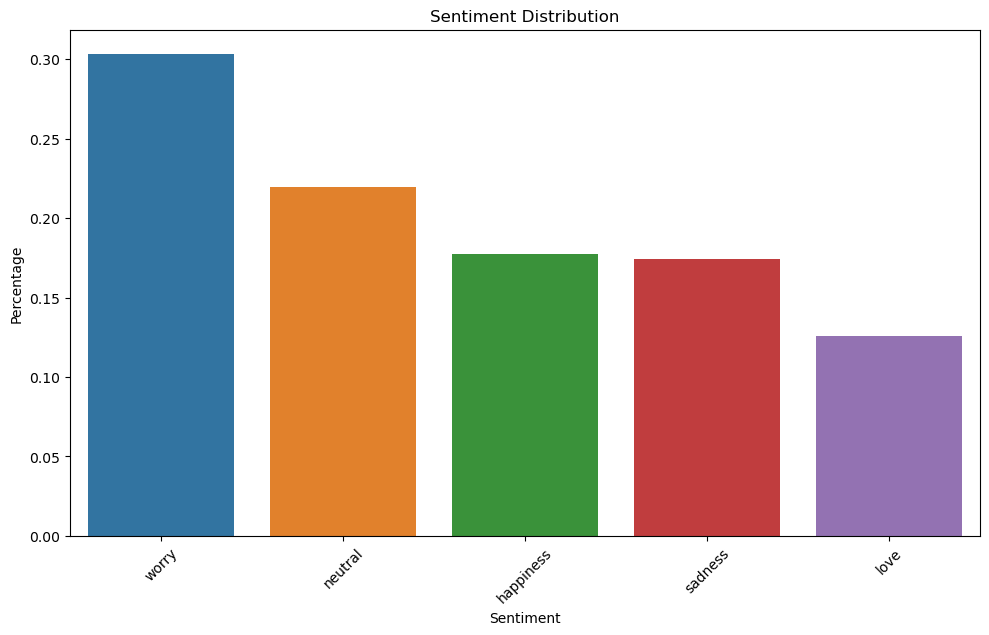

In [34]:
# distribution of the final dataframe

sentiments = final_df["sentiment"].value_counts(normalize = True).reset_index()
sentiments = sentiments.rename(columns = {"index": "sentiment", "sentiment": "percentage"})

fig, ax = plt.subplots(figsize = (10, 6))
sns.barplot(data = sentiments, x = "sentiment", y = "percentage")
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Percentage")
plt.tight_layout()
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
plt.show();

In [35]:
# checking for duplicated contents

final_df.duplicated("content").value_counts()

False    8129
True       25
dtype: int64

In [36]:
# dropping duplicates

final_df.drop_duplicates("content", keep = "first", inplace = True)

C:\Users\jocel\AppData\Local\Temp\ipykernel_16456\236460872.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df.drop_duplicates("content", keep = "first", inplace = True)


In [37]:
# finding contents with non-english characters

pattern = r"[^\x00-\x7F]"
non_english = final_df["content"].str.contains(pattern)
non_english

0        False
1        False
2        False
4        False
5        False
         ...  
10603    False
10604    False
10605    False
10606    False
10607    False
Name: content, Length: 8129, dtype: bool

In [38]:
non_english_rows = final_df[non_english]
non_english_rows.head()

tweet_id sentiment  \
539  1957460469     worry   
550  1957466651     worry   
650  1957544939   sadness   
711  1957595865   sadness   
732  1957613033     worry   

                                                                                                                                           content  
539                                   @Wykrzyknik uff, ble litt trist av ï¿½ lese den siste tweetsen din  the challenge prooved too be tough!! :'(  
550      Entered house searching mode yesterday... we need to find an apartment in Dï¿½sseldorf until the end of August, this one was temporary...  
650      Heathrow Connect is ï¿½7.40,i thought it was a bargain (express is 15),but then it terminated at Hayes/Harlington and i had to take a bus  
711  Is so freaking bored on the bus. Hate being poor, ï¿½4.80 return for a 10 min train or ï¿½2 return for an HOUR long bus.ipod has no battery 2  
732                                  Start of diet today  I think I have to face I will never get back down to 77kilos (unless I cut a leg off)ï¿½

In [39]:
# finding contents with url 

pattern = r"([http|ftp|https):\/\/([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:\/~+#-]*[\w@?^=%&\/~+#-])"
url = final_df["content"].str.contains(pattern)
url

0        False
1        False
2        False
4         True
5        False
         ...  
10603    False
10604    False
10605    False
10606     True
10607    False
Name: content, Length: 8129, dtype: bool

In [40]:
url_rows = final_df[url]
url_rows

tweet_id  sentiment  \
4      1956972116    neutral   
55     1957008802    sadness   
80     1957024334      worry   
129    1957072637       love   
137    1957081280      worry   
...           ...        ...   
10569  1753886802    neutral   
10574  1753887627    neutral   
10590  1753903731    neutral   
10597  1753904502       love   
10606  1753919043  happiness   

                                                                                                                                        content  
4                      No Topic Maps talks at the Balisage Markup Conference 2009   Program online at http://tr.im/mL6Z (via @bobdc) #topicmaps  
55               @xdjio Have a 3ware 9650SE, not fast enough for 3x X25-M SSD RAID5. 800Mhz IOP on the HPT. Might try an Adaptec 5405 (1.2Ghz).  
80     @seemouserun so I tried jumping without the trampoline and its like thud* thud*  shouldn't have eaten that cookie.  http://myloc.me/1XIz  
129                    @ddlovato i can`t wait to hear your new album. i`m sure will be amazing.please just replay to me  i love you so much!!!!  
137                             @RoasterBoy And these poor, unfortunate souls don't appear to have any pants at all...  ? http://blip.fm/~78qvz  
...                                                                                                                                         ...  
10569                                     says gud eve guys.. lets play poker@facebook yeah!! cant read my poker face  http://plurk.com/p/sw4yq  
10574      Obama last night: &quot;Most of you covered me, all of you voted for me. Apologies to the Fox table.&quot;       http://bit.ly/bGcnW  
10590            I made a MySpace for Twitter with the name &quot;The Twitter Kingdom&quot;. Here is the link: http://bit.ly/13PQtw  - join me!  
10597            Anyone knows a site like the Swedish site &quot;sl.se&quot; or the great useful &quot;www.tfl.gov.uk&quot;, but for Liverpool?  
10606                @niariley WASSUP BEAUTIFUL!!! FOLLOW ME!!  PEEP OUT MY NEW HIT SINGLES WWW.MYSPACE.COM/IPSOHOT I DEF. WAT U IN THE VIDEO!!  

[709 rows x 3 columns]

In [41]:
# changing sentiment columns to int

# final_df = final_df.replace({"worry": 0, "neutral": 1, "happiness": 2, "sadness": 3, "love": 4})
# final_df

In [42]:
final_df

tweet_id  sentiment  \
0      1956968487    sadness   
1      1956970424    sadness   
2      1956971586    sadness   
4      1956972116    neutral   
5      1956972359    sadness   
...           ...        ...   
10603  1753918881    neutral   
10604  1753918892    neutral   
10605  1753919005       love   
10606  1753919043  happiness   
10607  1753919049       love   

                                                                                                                                          content  
0            I should be sleep, but im not! thinking about an old friend who I want. but he's married now. damn, &amp; he wants me 2! scandalous!  
1      @BrodyJenner if u watch the hills in london u will realise what tourture it is because were weeks and weeks late  i just watch itonlinelol  
2                      How are YOU convinced that I have always wanted you? What signals did I give off...damn I think I just lost another friend  
4                        No Topic Maps talks at the Balisage Markup Conference 2009   Program online at http://tr.im/mL6Z (via @bobdc) #topicmaps  
5                                    so tired and i think i'm definitely going to get an ear infection.  going to bed &quot;early&quot; for once.  
...                                                                                                                                           ...  
10603                      @jasimmo Ooo showing of your French skills!! lol Things good over here. Lovely weather, so should be outside  How's u?  
10604                                @sendsome2me haha, yeah. Twitter has many uses. For me it's just to know what the ppl i care about are doing  
10605                 Happy Mother's Day to all the mommies out there, be you woman or man as long as you're 'momma' to someone this is your day!  
10606                  @niariley WASSUP BEAUTIFUL!!! FOLLOW ME!!  PEEP OUT MY NEW HIT SINGLES WWW.MYSPACE.COM/IPSOHOT I DEF. WAT U IN THE VIDEO!!  
10607        @mopedronin bullet train from tokyo    the gf and i have been visiting japan since thursday  vacation/sightseeing    gaijin godzilla  

[8129 rows x 3 columns]

## Preprocessing

In [43]:
tokenizer = RegexpTokenizer(r"(?u)\w{4,}")
stopwords_list = stopwords.words("english")
lemmatizer = WordNetLemmatizer()

def preprocess_text(text, tokenizer, stopwords_list, lemmatizer):

#   Standardize case (lowercase the text)
    lower_case = text.lower()
    
#   Remove hashtags, urls, mentions and strip whitespace
    tweet_lower = re.sub(r"@[a-z0-9_]+|#[a-z0-9_]+|http\S+", "", lower_case).strip().replace("\r", "").replace("\n", "").replace("\t", "")
    
#   Tokenize text using `tokenizer`
    tokenized = tokenizer.tokenize(tweet_lower)
    
#   Remove stopwords using `stopwords_list`
    token_stopped_list = [word for word in tokenized if (word.lower() not in stopwords_list) & (word not in ["quot", "good", "like", "know", "go", "much", "back", "really", "well", "would"])]

#   Remove non-english text
    non_english_pattern = "[^a-zA-Z\s]+"
    filtered_words = []
    for word in token_stopped_list:
        match = re.search(non_english_pattern, word)
        if not match:
            filtered_words.append(word)
        
#   Lemmatize the tokenized text using 'lemmatizer'
    lemmatize = [lemmatizer.lemmatize(text) for text in filtered_words]

#   Return the preprocessed text
    return lemmatize


<>:20: DeprecationWarning: invalid escape sequence \s
<>:20: DeprecationWarning: invalid escape sequence \s
C:\Users\jocel\AppData\Local\Temp\ipykernel_16456\3769564906.py:20: DeprecationWarning: invalid escape sequence \s
  non_english_pattern = "[^a-zA-Z\s]+"


In [44]:
context_data = final_df["content"].apply(lambda x: preprocess_text(x, tokenizer, stopwords_list, lemmatizer))
context_data

0                                         [sleep, thinking, friend, want, married, damn, want, scandalous]
1                           [watch, hill, london, realise, tourture, week, week, late, watch, itonlinelol]
2                            [convinced, always, wanted, signal, give, damn, think, lost, another, friend]
4                                        [topic, map, talk, balisage, markup, conference, program, online]
5                                               [tired, think, definitely, going, infection, going, early]
                                                       ...                                                
10603                                            [showing, french, skill, thing, lovely, weather, outside]
10604                                                                [haha, yeah, twitter, many, us, care]
10605                                                  [happy, mother, mommy, woman, long, momma, someone]
10606                                

In [45]:
final_df["preprocessed_text"] = context_data

C:\Users\jocel\AppData\Local\Temp\ipykernel_16456\2716957634.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df["preprocessed_text"] = context_data


In [46]:
# turning preprocessed_text column to strings

final_df["joined_preprocessed_text"] = final_df["preprocessed_text"].str.join(" ")

C:\Users\jocel\AppData\Local\Temp\ipykernel_16456\3280838169.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df["joined_preprocessed_text"] = final_df["preprocessed_text"].str.join(" ")


In [47]:
final_df

tweet_id  sentiment  \
0      1956968487    sadness   
1      1956970424    sadness   
2      1956971586    sadness   
4      1956972116    neutral   
5      1956972359    sadness   
...           ...        ...   
10603  1753918881    neutral   
10604  1753918892    neutral   
10605  1753919005       love   
10606  1753919043  happiness   
10607  1753919049       love   

                                                                                                                                          content  \
0            I should be sleep, but im not! thinking about an old friend who I want. but he's married now. damn, &amp; he wants me 2! scandalous!   
1      @BrodyJenner if u watch the hills in london u will realise what tourture it is because were weeks and weeks late  i just watch itonlinelol   
2                      How are YOU convinced that I have always wanted you? What signals did I give off...damn I think I just lost another friend   
4                        No Topic Maps talks at the Balisage Markup Conference 2009   Program online at http://tr.im/mL6Z (via @bobdc) #topicmaps   
5                                    so tired and i think i'm definitely going to get an ear infection.  going to bed &quot;early&quot; for once.   
...                                                                                                                                           ...   
10603                      @jasimmo Ooo showing of your French skills!! lol Things good over here. Lovely weather, so should be outside  How's u?   
10604                                @sendsome2me haha, yeah. Twitter has many uses. For me it's just to know what the ppl i care about are doing   
10605                 Happy Mother's Day to all the mommies out there, be you woman or man as long as you're 'momma' to someone this is your day!   
10606                  @niariley WASSUP BEAUTIFUL!!! FOLLOW ME!!  PEEP OUT MY NEW HIT SINGLES WWW.MYSPACE.COM/IPSOHOT I DEF. WAT U IN THE VIDEO!!   
10607        @mopedronin bullet train from tokyo    the gf and i have been visiting japan since thursday  vacation/sightseeing    gaijin godzilla   

                                                                                       preprocessed_text  \
0                                       [sleep, thinking, friend, want, married, damn, want, scandalous]   
1                         [watch, hill, london, realise, tourture, week, week, late, watch, itonlinelol]   
2                          [convinced, always, wanted, signal, give, damn, think, lost, another, friend]   
4                                      [topic, map, talk, balisage, markup, conference, program, online]   
5                                             [tired, think, definitely, going, infection, going, early]   
...                                                                                                  ...   
10603                                          [showing, french, skill, thing, lovely, weather, outside]   
10604                                                              [haha, yeah, twitter, many, us, care]   
10605                                                [happy, mother, mommy, woman, long, momma, someone]   
10606                                 [wassup, beautiful, follow, peep, single, myspace, ipsohot, video]   
10607  [bullet, train, tokyo, visiting, japan, since, thursday, vacation, sightseeing, gaijin, godzilla]   

                                                                    joined_preprocessed_text  
0                                    sleep thinking friend want married damn want scandalous  
1                        watch hill london realise tourture week week late watch itonlinelol  
2                         convinced always wanted signal give damn think lost another friend  
4                                   topic map talk balisage markup conference program online  
5                                         tired think definitel

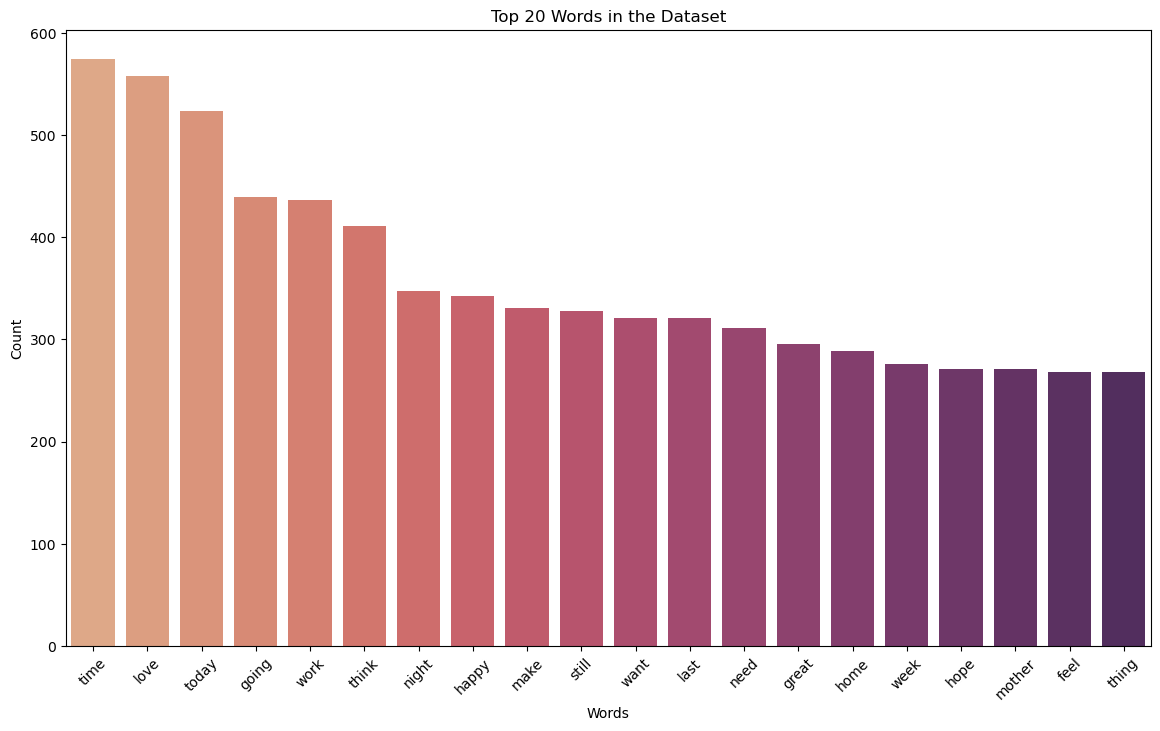

In [48]:
# visualizing frequency distribution
freq_dist = FreqDist(final_df["preprocessed_text"].explode())

fig, ax = plt.subplots(figsize = (14, 8))
top_20 = list(freq_dist.most_common(20))
labels = [i[0] for i in top_20]
values = [i[1] for i in top_20]
sns.barplot(x = labels, y = values, palette = "flare", ax = ax)
plt.title("Top 20 Words in the Dataset")
plt.xlabel("Words")
plt.ylabel("Count")
plt.xticks(rotation = 45)
plt.show();

C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=trans

C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=trans

C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transpose

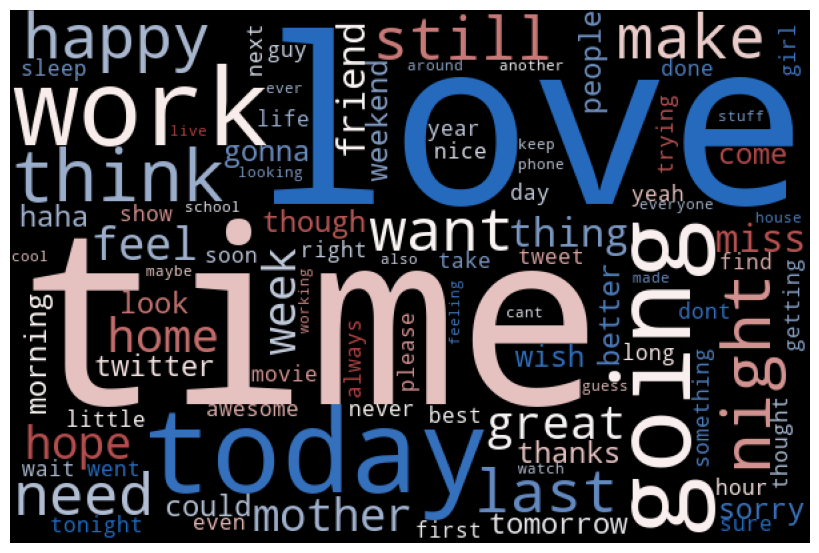

In [49]:
# creating wordCloud of most frequent words in the Dataset
wordcloud = WordCloud(width = 600, height = 400,
                colormap="vlag", background_color ='black',
                min_font_size = 10, random_state = 30).generate_from_frequencies(freq_dist)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

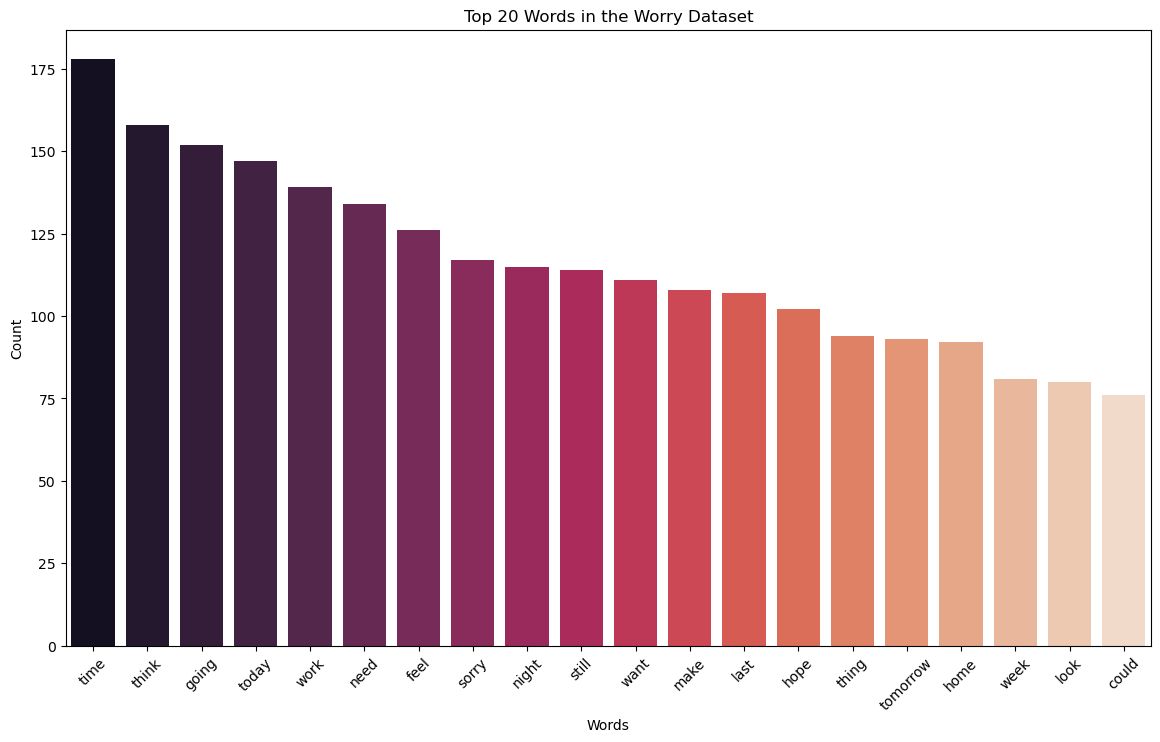

In [50]:
# most frequent words under the sentiment "worry"

worry = final_df.loc[final_df["sentiment"] == "worry"]

worry_freq_dist = FreqDist(worry["preprocessed_text"].explode())

fig, ax = plt.subplots(figsize = (14, 8))
top_20 = list(worry_freq_dist.most_common(20))
labels = [i[0] for i in top_20]
values = [i[1] for i in top_20]
sns.barplot(x = labels, y = values, palette = "rocket", ax = ax)
plt.title("Top 20 Words in the Worry Dataset")
plt.xlabel("Words")
plt.ylabel("Count")
plt.xticks(rotation = 45)
plt.show();

C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=trans

C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=trans

C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transpose

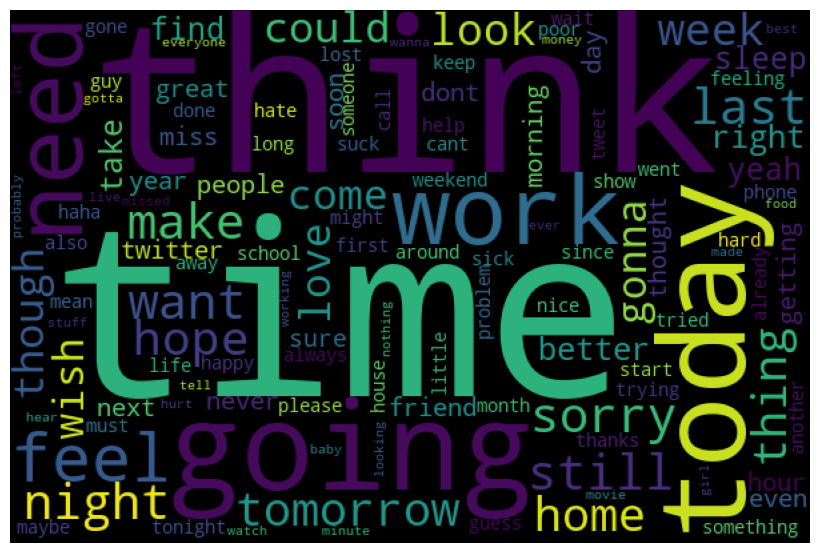

In [51]:
# creating wordCloud of most frequent words in Worry Dataset
wordcloud = WordCloud(width = 600, height = 400,
                colormap="viridis", background_color ='black',
                min_font_size = 10, random_state = 30).generate_from_frequencies(worry_freq_dist)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show();

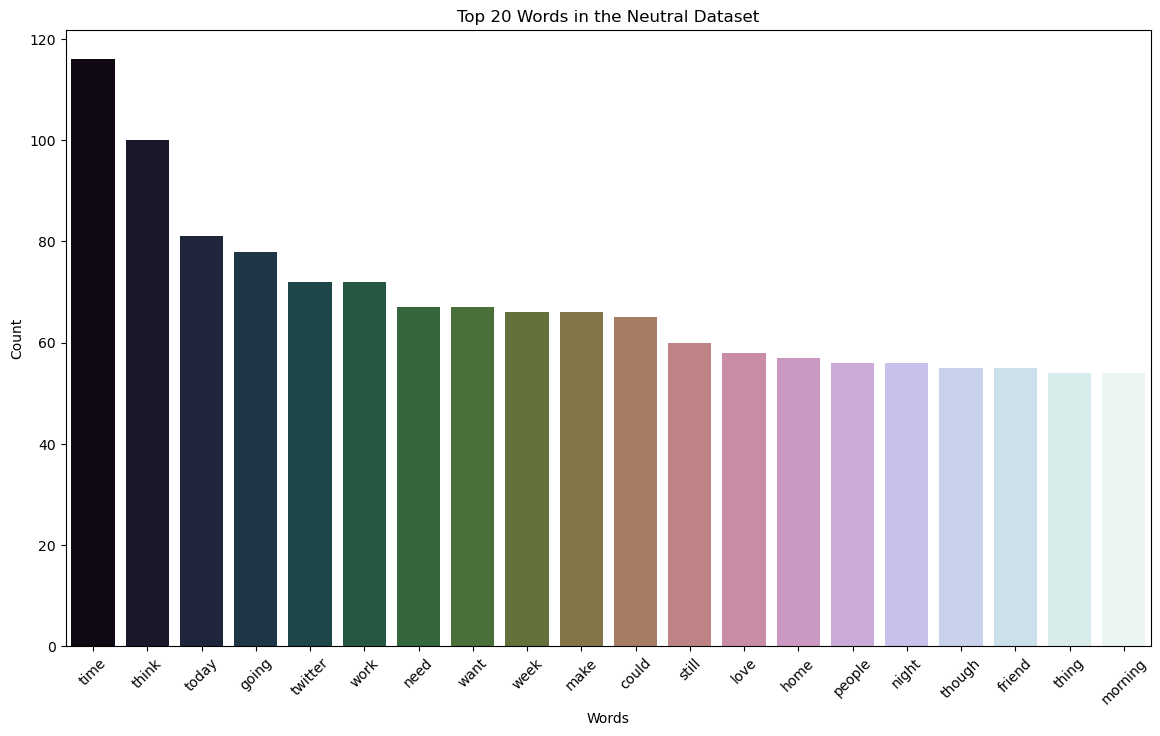

In [52]:
# frequency distribution of sentiment "neutral"

neutral = final_df.loc[final_df["sentiment"] == "neutral"]

neutral_freq_dist = FreqDist(neutral["preprocessed_text"].explode())

fig, ax = plt.subplots(figsize = (14, 8))
top_20 = list(neutral_freq_dist.most_common(20))
labels = [i[0] for i in top_20]
values = [i[1] for i in top_20]
sns.barplot(x = labels, y = values, palette = "cubehelix", ax = ax)
plt.title("Top 20 Words in the Neutral Dataset")
plt.xlabel("Words")
plt.ylabel("Count")
plt.xticks(rotation = 45)
plt.show();

C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=trans

C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=trans

C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transpose

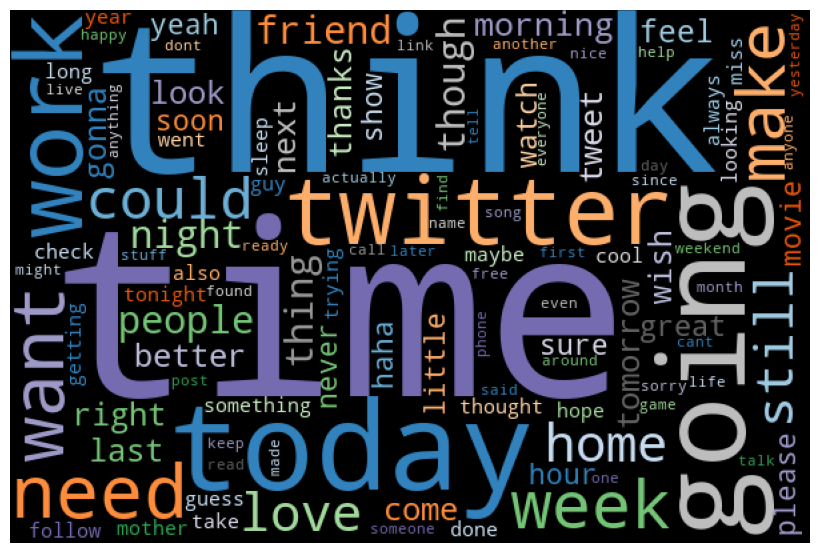

In [53]:
# creating wordCloud of most frequent words in the Neutral Dataset
wordcloud = WordCloud(width = 600, height = 400,
                colormap="tab20c", background_color ='black',
                min_font_size = 10, random_state = 30).generate_from_frequencies(neutral_freq_dist)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

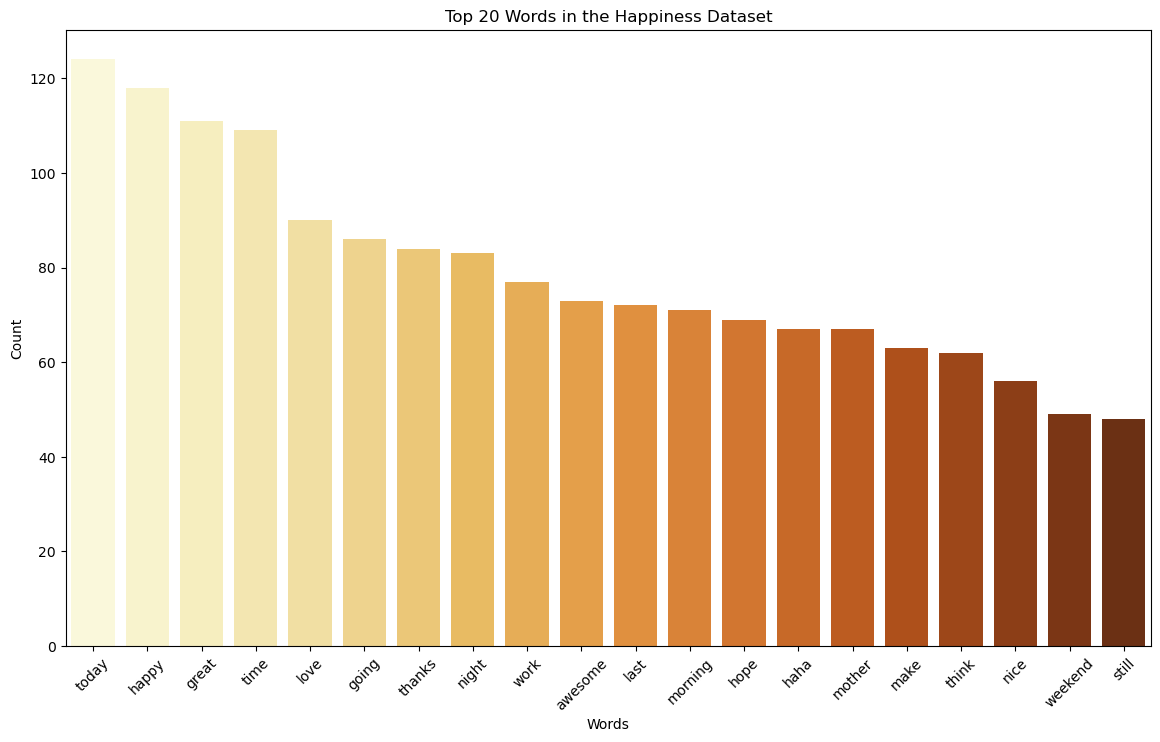

In [54]:
# frequency distribution of happiness

happiness = final_df.loc[final_df["sentiment"] == "happiness"]

happ_freq_dist = FreqDist(happiness["preprocessed_text"].explode())

fig, ax = plt.subplots(figsize = (14, 8))
top_20 = list(happ_freq_dist.most_common(20))
labels = [i[0] for i in top_20]
values = [i[1] for i in top_20]
sns.barplot(x = labels, y = values, palette = "YlOrBr", ax = ax)
plt.title("Top 20 Words in the Happiness Dataset")
plt.xlabel("Words")
plt.ylabel("Count")
plt.xticks(rotation = 45)
plt.show();

C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=trans

C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=trans

C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=trans

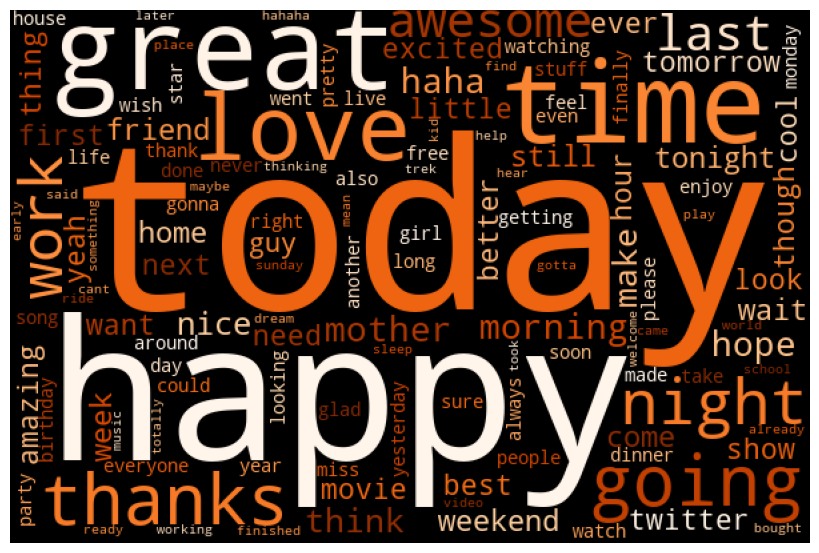

In [55]:
# creating wordCloud of most frequent words in the Happiness Dataset
wordcloud = WordCloud(width = 600, height = 400,
                colormap="Oranges", background_color ='black',
                min_font_size = 10, random_state = 30).generate_from_frequencies(happ_freq_dist)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

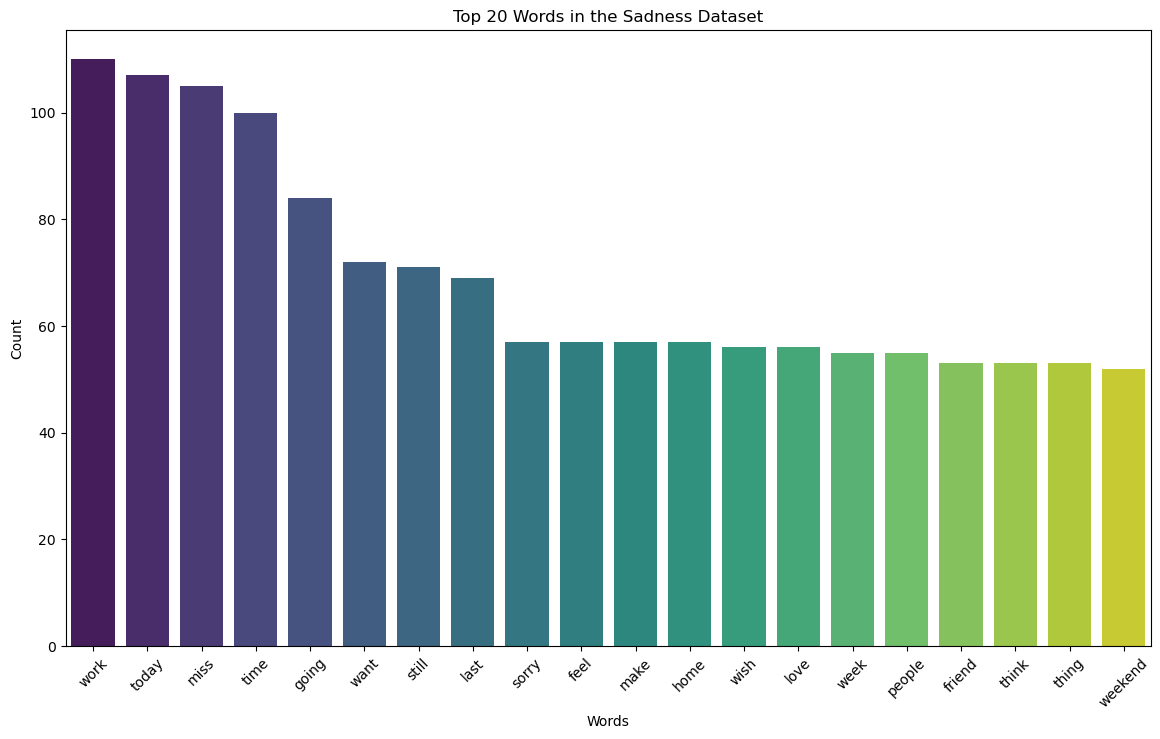

In [56]:
# frequency distribution of sadness 

sadness = final_df.loc[final_df["sentiment"] == "sadness"]

sad_freq_dist = FreqDist(sadness["preprocessed_text"].explode())

fig, ax = plt.subplots(figsize = (14, 8))
top_20 = list(sad_freq_dist.most_common(20))
labels = [i[0] for i in top_20]
values = [i[1] for i in top_20]
sns.barplot(x = labels, y = values, palette = "viridis", ax = ax)
plt.title("Top 20 Words in the Sadness Dataset")
plt.xlabel("Words")
plt.ylabel("Count")
plt.xticks(rotation = 45)
plt.show();

C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=trans

C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=trans

C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=trans

C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation i

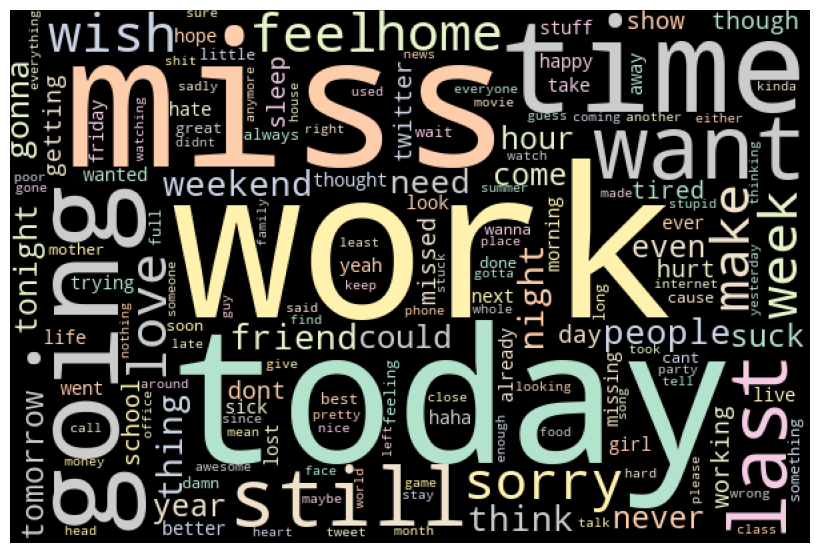

In [57]:
# creating wordCloud of most frequent words in the Sadness Dataset
wordcloud = WordCloud(width = 600, height = 400,
                colormap="Pastel2", background_color ='black',
                min_font_size = 10, random_state = 30).generate_from_frequencies(sad_freq_dist)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show();

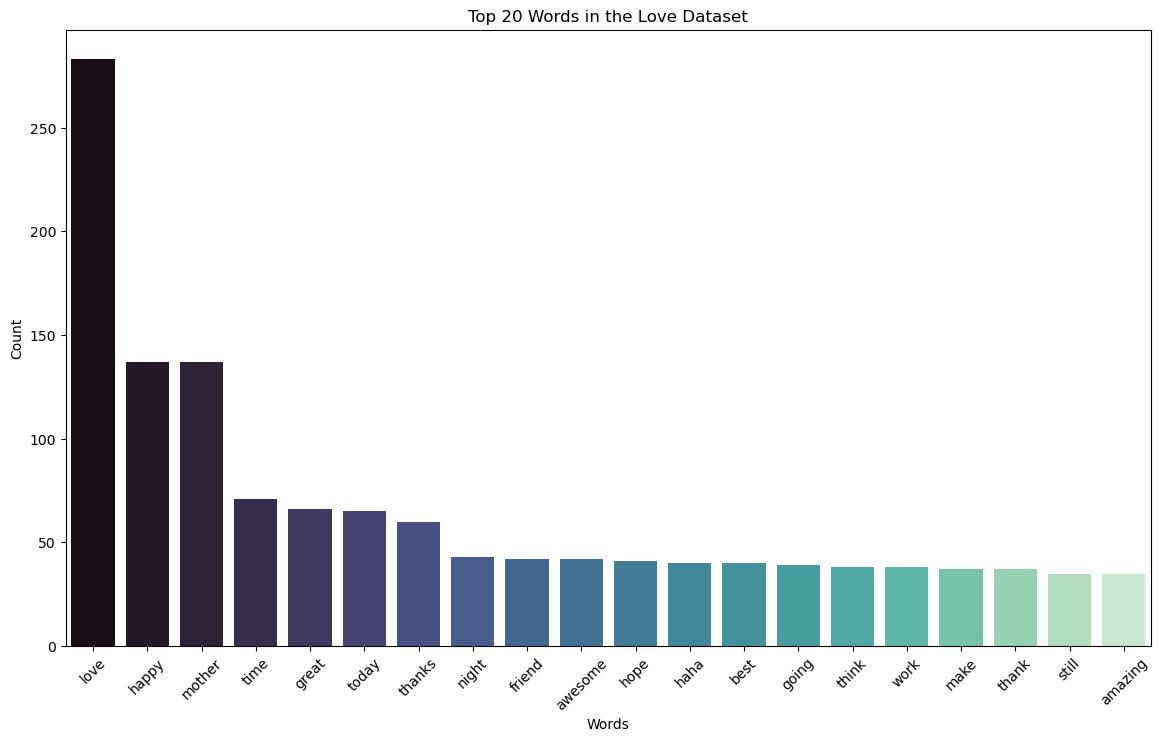

In [58]:
# frequency ditribution of love

love = final_df.loc[final_df["sentiment"] == "love"] 

love_freq_dist = FreqDist(love["preprocessed_text"].explode())

fig, ax = plt.subplots(figsize = (14, 8))
top_20 = list(love_freq_dist.most_common(20))
labels = [i[0] for i in top_20]
values = [i[1] for i in top_20]
sns.barplot(x = labels, y = values, palette = "mako", ax = ax)
plt.title("Top 20 Words in the Love Dataset")
plt.xlabel("Words")
plt.ylabel("Count")
plt.xticks(rotation = 45)
plt.show();

C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=trans

C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=trans

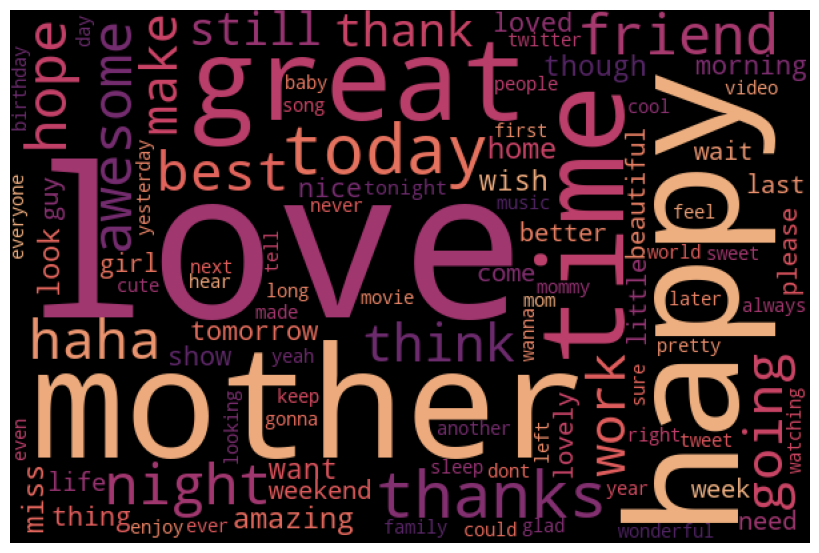

In [59]:
# creating wordCloud of most frequent words in the Love Dataset
wordcloud = WordCloud(width = 600, height = 400,
                colormap="flare", background_color ='black',
                min_font_size = 10, random_state = 30).generate_from_frequencies(love_freq_dist)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [60]:
final_df = final_df[final_df["sentiment"] != "neutral"]

In [61]:
final_df['sentiment'].value_counts()

worry        2471
happiness    1441
sadness      1422
love         1009
Name: sentiment, dtype: int64

In [62]:
# combining happiness and love as 1 (positive) and combining sadness and worry as 0 (negative)

final_df["sentiment"] = final_df["sentiment"].replace(to_replace = ("happiness", "love"), value = "positive")
final_df["sentiment"] = final_df["sentiment"].replace(to_replace = ("worry", "sadness"), value = "negative")

C:\Users\jocel\AppData\Local\Temp\ipykernel_16456\2042218169.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df["sentiment"] = final_df["sentiment"].replace(to_replace = ("happiness", "love"), value = "positive")
C:\Users\jocel\AppData\Local\Temp\ipykernel_16456\2042218169.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df["sentiment"] = final_df["sentiment"].replace(to_replace = ("worry", "sadness"), value = "negative")


In [63]:
final_df

tweet_id sentiment  \
0      1956968487  negative   
1      1956970424  negative   
2      1956971586  negative   
5      1956972359  negative   
6      1956972444  negative   
...           ...       ...   
10601  1753905121  positive   
10602  1753918822  positive   
10605  1753919005  positive   
10606  1753919043  positive   
10607  1753919049  positive   

                                                                                                                                          content  \
0            I should be sleep, but im not! thinking about an old friend who I want. but he's married now. damn, &amp; he wants me 2! scandalous!   
1      @BrodyJenner if u watch the hills in london u will realise what tourture it is because were weeks and weeks late  i just watch itonlinelol   
2                      How are YOU convinced that I have always wanted you? What signals did I give off...damn I think I just lost another friend   
5                                    so tired and i think i'm definitely going to get an ear infection.  going to bed &quot;early&quot; for once.   
6                          On my way home n having 2 deal w underage girls drinking gin on da bus while talking bout keggers......damn i feel old   
...                                                                                                                                           ...   
10601                 @McMedia husband is golfing &amp; the Toddler and I shall frolic. Am I the consummate mama in that Im so happy with my day?   
10602         His snoring is so annoying n it keeps me from sleeping (like right now, lol) but I honestly wud miss it if it eva left  I love him.   
10605                 Happy Mother's Day to all the mommies out there, be you woman or man as long as you're 'momma' to someone this is your day!   
10606                  @niariley WASSUP BEAUTIFUL!!! FOLLOW ME!!  PEEP OUT MY NEW HIT SINGLES WWW.MYSPACE.COM/IPSOHOT I DEF. WAT U IN THE VIDEO!!   
10607        @mopedronin bullet train from tokyo    the gf and i have been visiting japan since thursday  vacation/sightseeing    gaijin godzilla   

                                                                                       preprocessed_text  \
0                                       [sleep, thinking, friend, want, married, damn, want, scandalous]   
1                         [watch, hill, london, realise, tourture, week, week, late, watch, itonlinelol]   
2                          [convinced, always, wanted, signal, give, damn, think, lost, another, friend]   
5                                             [tired, think, definitely, going, infection, going, early]   
6                             [home, deal, underage, girl, drinking, talking, bout, keggers, damn, feel]   
...                                                                                                  ...   
10601                                [husband, golfing, toddler, shall, frolic, consummate, mama, happy]   
10602                             [snoring, annoying, keep, sleeping, right, honestly, miss, left, love]   
10605                                                [happy, mother, mommy, woman, long, momma, someone]   
10606                                 [wassup, beautiful, follow, peep, single, myspace, ipsohot, video]   
10607  [bullet, train, tokyo, visiting, japan, since, thursday, vacation, sightseeing, gaijin, godzilla]   

                                                                    joined_preprocessed_text  
0                                    sleep thinking friend want married damn want scandalous  
1                        watch hill london realise tourture week week late watch itonlinelol  
2                         convinced always wanted signal give damn think lost another friend  
5                                         tired think definitely going infection going early  
6                            home deal underage girl drinking talking bout 

In [64]:
final_df["sentiment"].replace(to_replace = {"positive": 1, "negative": 0}, inplace = True)

C:\Users\jocel\AppData\Local\Temp\ipykernel_16456\966154981.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df["sentiment"].replace(to_replace = {"positive": 1, "negative": 0}, inplace = True)


In [65]:
final_df

tweet_id  sentiment  \
0      1956968487          0   
1      1956970424          0   
2      1956971586          0   
5      1956972359          0   
6      1956972444          0   
...           ...        ...   
10601  1753905121          1   
10602  1753918822          1   
10605  1753919005          1   
10606  1753919043          1   
10607  1753919049          1   

                                                                                                                                          content  \
0            I should be sleep, but im not! thinking about an old friend who I want. but he's married now. damn, &amp; he wants me 2! scandalous!   
1      @BrodyJenner if u watch the hills in london u will realise what tourture it is because were weeks and weeks late  i just watch itonlinelol   
2                      How are YOU convinced that I have always wanted you? What signals did I give off...damn I think I just lost another friend   
5                                    so tired and i think i'm definitely going to get an ear infection.  going to bed &quot;early&quot; for once.   
6                          On my way home n having 2 deal w underage girls drinking gin on da bus while talking bout keggers......damn i feel old   
...                                                                                                                                           ...   
10601                 @McMedia husband is golfing &amp; the Toddler and I shall frolic. Am I the consummate mama in that Im so happy with my day?   
10602         His snoring is so annoying n it keeps me from sleeping (like right now, lol) but I honestly wud miss it if it eva left  I love him.   
10605                 Happy Mother's Day to all the mommies out there, be you woman or man as long as you're 'momma' to someone this is your day!   
10606                  @niariley WASSUP BEAUTIFUL!!! FOLLOW ME!!  PEEP OUT MY NEW HIT SINGLES WWW.MYSPACE.COM/IPSOHOT I DEF. WAT U IN THE VIDEO!!   
10607        @mopedronin bullet train from tokyo    the gf and i have been visiting japan since thursday  vacation/sightseeing    gaijin godzilla   

                                                                                       preprocessed_text  \
0                                       [sleep, thinking, friend, want, married, damn, want, scandalous]   
1                         [watch, hill, london, realise, tourture, week, week, late, watch, itonlinelol]   
2                          [convinced, always, wanted, signal, give, damn, think, lost, another, friend]   
5                                             [tired, think, definitely, going, infection, going, early]   
6                             [home, deal, underage, girl, drinking, talking, bout, keggers, damn, feel]   
...                                                                                                  ...   
10601                                [husband, golfing, toddler, shall, frolic, consummate, mama, happy]   
10602                             [snoring, annoying, keep, sleeping, right, honestly, miss, left, love]   
10605                                                [happy, mother, mommy, woman, long, momma, someone]   
10606                                 [wassup, beautiful, follow, peep, single, myspace, ipsohot, video]   
10607  [bullet, train, tokyo, visiting, japan, since, thursday, vacation, sightseeing, gaijin, godzilla]   

                                                                    joined_preprocessed_text  
0                                    sleep thinking friend want married damn want scandalous  
1                        watch hill london realise tourture week week late watch itonlinelol  
2                         convinced always wanted signal give damn think lost another friend  
5                                         tired think definitely going infection going early  
6                            home deal underage girl drinking t

In [66]:
final_df['sentiment'].value_counts(normalize = True)

0    0.613747
1    0.386253
Name: sentiment, dtype: float64

In [67]:
sentiment = final_df[["sentiment"]].value_counts(normalize = True).reset_index()
sentiment = sentiment.rename(columns = {0: "Percentage"})
sentiment

sentiment  Percentage
0          0    0.613747
1          1    0.386253

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


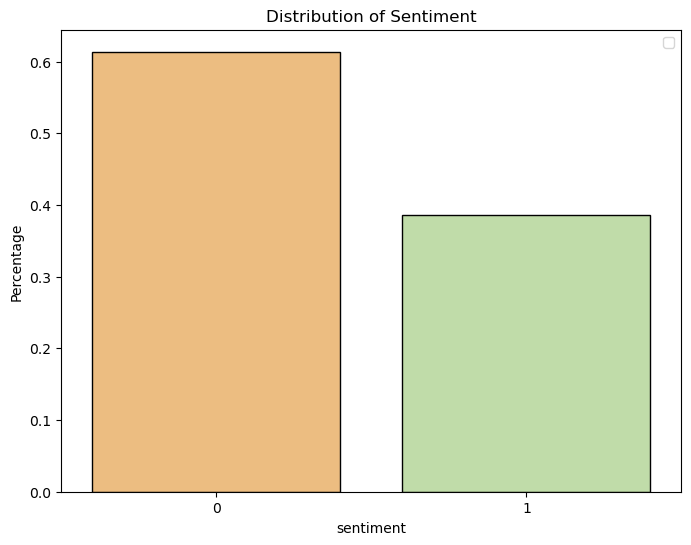

In [68]:
# distribution of sentiment
fig, ax = plt.subplots(figsize = (8, 6))
sns.barplot(data = sentiment, x = "sentiment", y = "Percentage", edgecolor = "black", palette = "Spectral")
plt.title("Distribution of Sentiment")
plt.legend()
plt.show();

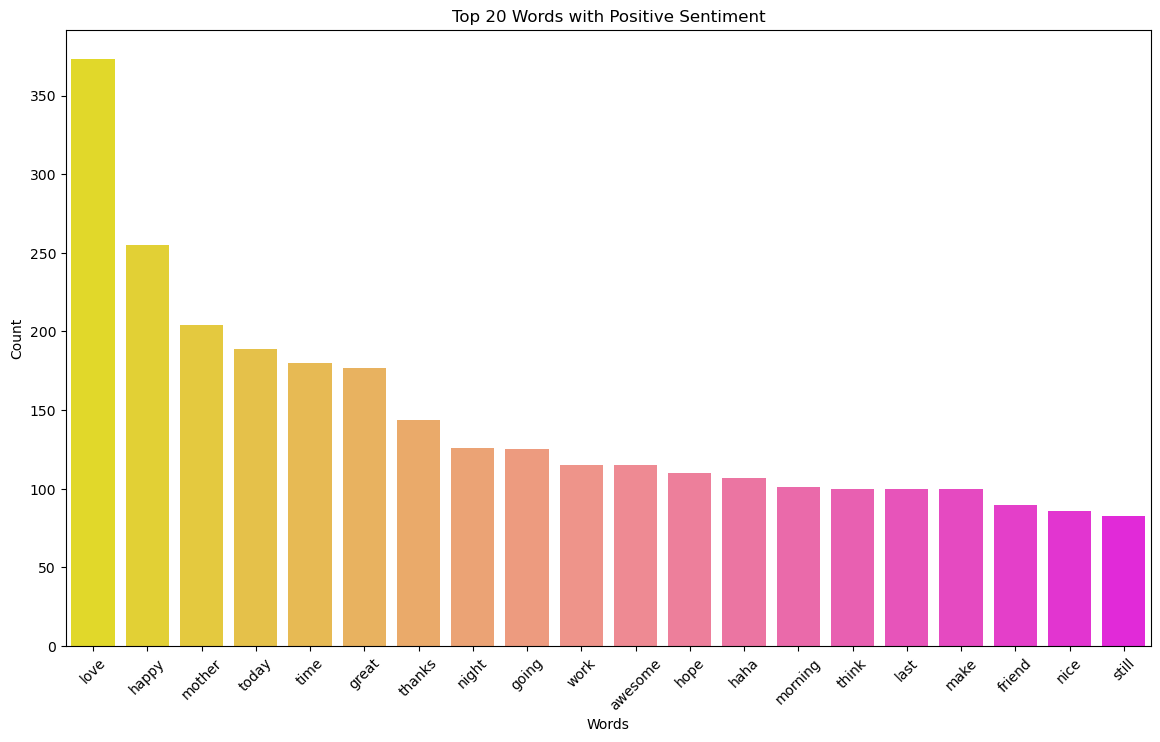

In [69]:
# frequency distribution of positive sentiments

positive = final_df.loc[final_df["sentiment"] == 1] 

pos_freq_dist = FreqDist(positive["preprocessed_text"].explode())

fig, ax = plt.subplots(figsize = (14, 8))
top_20 = list(pos_freq_dist.most_common(20))
labels = [i[0] for i in top_20]
values = [i[1] for i in top_20]
sns.barplot(x = labels, y = values, palette = "spring_r", ax = ax)
plt.title("Top 20 Words with Positive Sentiment")
plt.xlabel("Words")
plt.ylabel("Count")
plt.xticks(rotation = 45)
plt.show();

C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=trans

C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTATE_90
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\jocel\an

C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTATE_90
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTATE_90
C:\Users\jocel\anaconda3\lib\site-packages

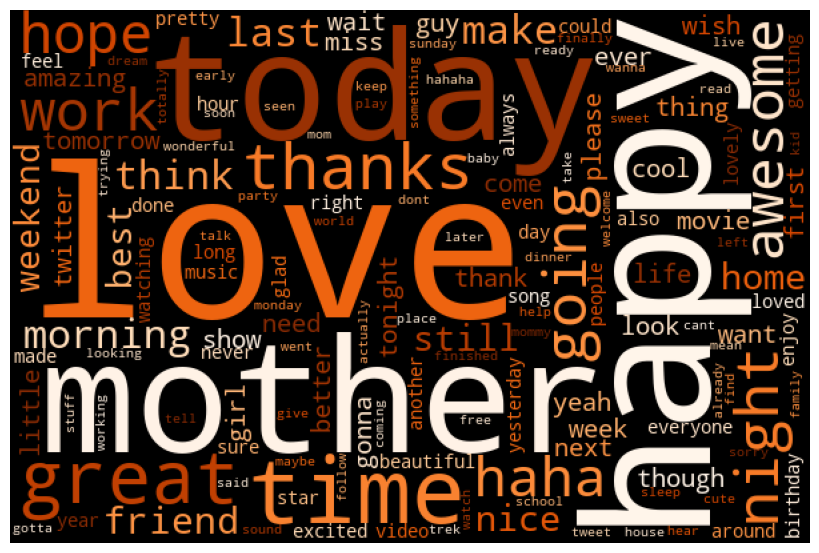

In [70]:
# creating wordCloud of most frequent words under the positive sentiment
wordcloud = WordCloud(width = 600, height = 400,
                colormap="Oranges", background_color ='black',
                min_font_size = 10, random_state = 30).generate_from_frequencies(pos_freq_dist)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

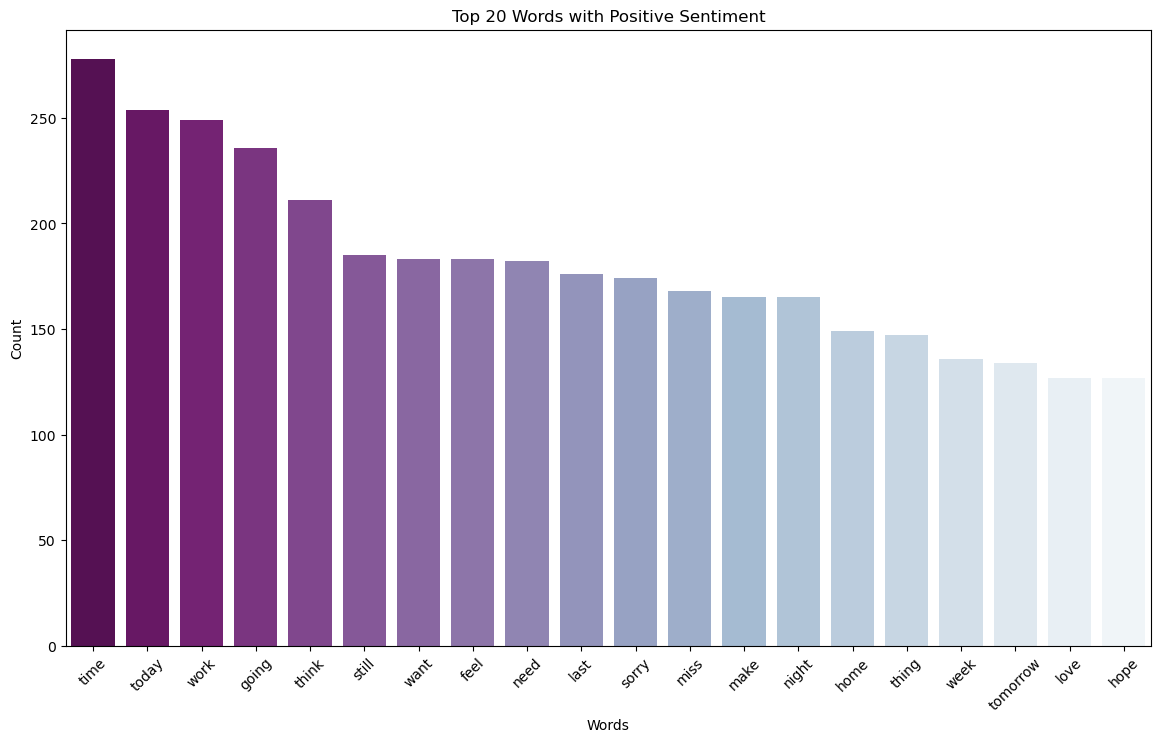

In [71]:
# frequency distribution of negative sentiments

negative = final_df.loc[final_df["sentiment"] == 0] 

neg_freq_dist = FreqDist(negative["preprocessed_text"].explode())

fig, ax = plt.subplots(figsize = (14, 8))
top_20 = list(neg_freq_dist.most_common(20))
labels = [i[0] for i in top_20]
values = [i[1] for i in top_20]
sns.barplot(x = labels, y = values, palette = "BuPu_r", ax = ax)
plt.title("Top 20 Words with Positive Sentiment")
plt.xlabel("Words")
plt.ylabel("Count")
plt.xticks(rotation = 45)
plt.show();

C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=trans

C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=trans

C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transpose

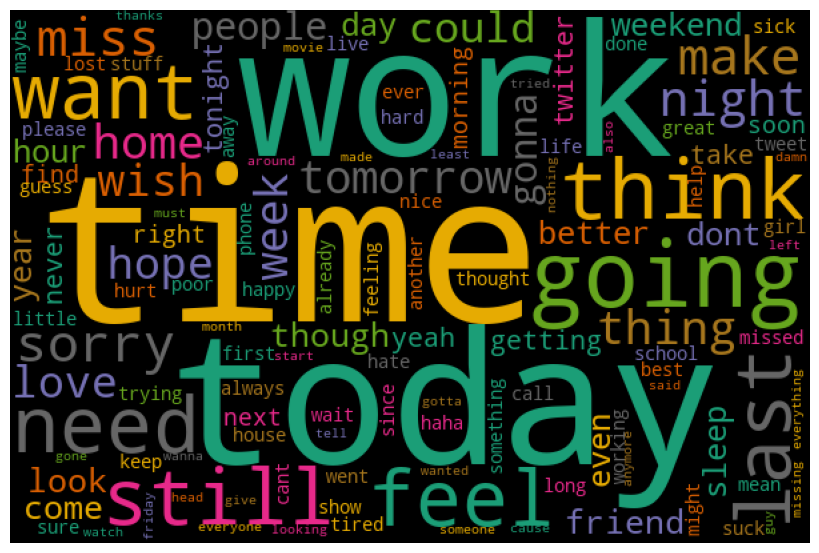

In [72]:
# creating wordCloud of most frequent words under the negative sentiment
wordcloud = WordCloud(width = 600, height = 400,
                colormap="Dark2", background_color ='black',
                min_font_size = 10, random_state = 30).generate_from_frequencies(neg_freq_dist)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

## Modeling

In [73]:
# creating train test split

X_train, X_test, y_train, y_test = train_test_split(final_df["joined_preprocessed_text"], 
                                                    final_df["sentiment"], 
                                                    test_size = 0.30, 
                                                    random_state = 2021)

In [74]:
X_train

6406     happy star war going make pasta showered dressed watch film day day
3289                           poor baby think allergy amything sence monday
2829                              week biology exam revise bone time limited
3483          walking think polish used cleaning earlier made floor slippery
597                                morning alex hope tweeting lot today miss
                                        ...                                 
4114           wanna movie keith jmccartney look sooo none video store carry
1754                         degree gorgeous stuck library midterm hour lame
10345     soetimes envy spent whole life place deep root grass side syndrome
5283     retro prom wishing dance gonna miss great dancing still blast drink
1734             stupid competition stuff keep getting going word today kill
Name: joined_preprocessed_text, Length: 4440, dtype: object

## Multinomial Naive Bayes

In [75]:
# pipe1 = Pipeline([
#     ("smote", SMOTE())
#     ("count_vec", CountVectorizer()),
#     ("multi_nb", MultinomialNB())
# ])

# pipe1

from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

pipe1 = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('smote', SMOTE()),
    ('classifier', MultinomialNB())
])
pipe1

Pipeline(steps=[('vectorizer', CountVectorizer()), ('smote', SMOTE()),
                ('classifier', MultinomialNB())])

In [76]:
# fit training set 
pipe1.fit(X_train, y_train)

# test set prediction 
pipe1_y_pred = pipe1.predict(X_test)

# classification report
print("Model 1 Classification Report: \n", classification_report(y_test, pipe1_y_pred))

Model 1 Classification Report: 
               precision    recall  f1-score   support

           0       0.74      0.79      0.77      1149
           1       0.65      0.59      0.61       754

    accuracy                           0.71      1903
   macro avg       0.69      0.69      0.69      1903
weighted avg       0.70      0.71      0.71      1903



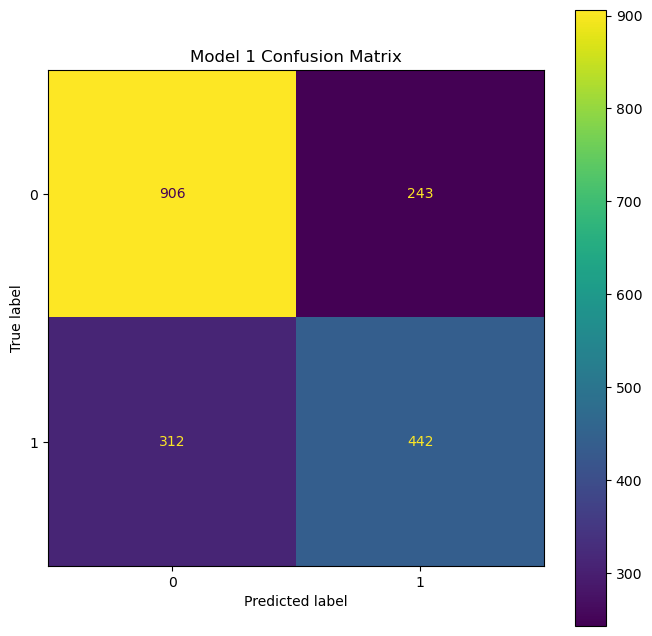

In [77]:
# plotting confusion matrix

fig, ax = plt.subplots(figsize = (8, 8))
ax.set_title("Model 1 Confusion Matrix")
plot_confusion_matrix(pipe1, X_test, y_test, ax = ax)
plt.show();

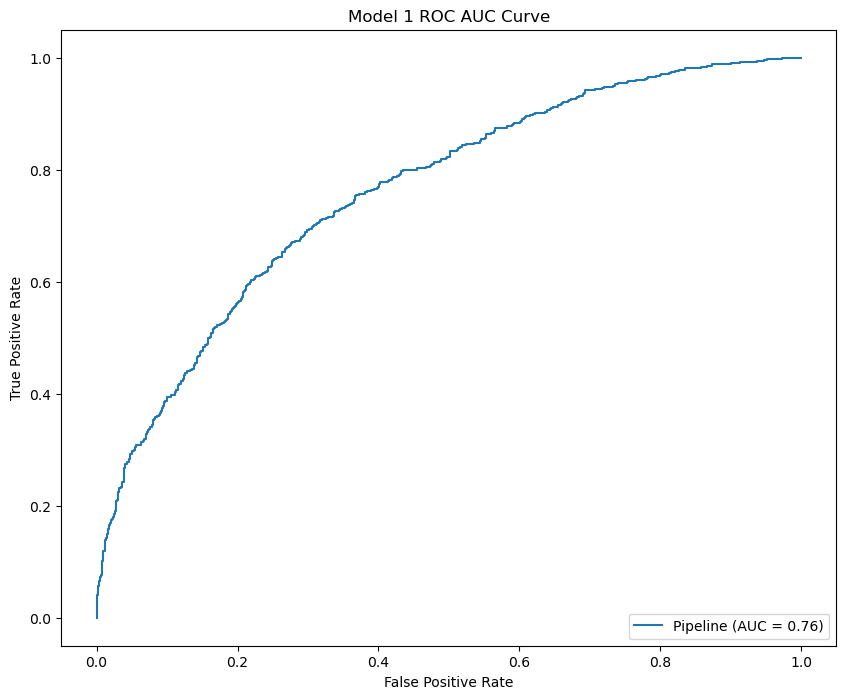

In [78]:
# plotting the AUC Curve 

fig, ax = plt.subplots(figsize = (10, 8))
plot_roc_curve(pipe1, X_test, y_test, ax = ax)
ax.set_title("Model 1 ROC AUC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show();

## Logistic Regression

## Decision Trees

In [79]:
pipe2 = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('smote', SMOTE()),
    ('tree', DecisionTreeClassifier(criterion = "gini", max_depth = 15, min_samples_leaf = 3, min_samples_split = 3))
])
pipe2

Pipeline(steps=[('vectorizer', CountVectorizer()), ('smote', SMOTE()),
                ('tree',
                 DecisionTreeClassifier(max_depth=15, min_samples_leaf=3,
                                        min_samples_split=3))])

In [80]:
# parameter grid
# grid = [{
#     "tree__criterion": ["gini", "entropy"], 
#     "tree__max_depth": [12, 15, 17], 
#     "tree__min_samples_split": [1, 2, 3],
#     "tree__min_samples_leaf": [1, 2, 3]
# }]

# grid search
# gs_pipe2 = GridSearchCV(estimator = pipe2, param_grid = grid, scoring = "accuracy", cv = 3)

# gs_pipe2.fit(X_train, y_train)

# best params
# gs_pipe2.best_params_

In [81]:
# fitting train set 
pipe2.fit(X_train, y_train)

# prediction 
pipe2_y_pred = pipe2.predict(X_test)

print("Model 2 Classification Report:", classification_report(y_test, pipe2_y_pred))

Model 2 Classification Report:               precision    recall  f1-score   support

           0       0.67      0.92      0.78      1149
           1       0.72      0.32      0.44       754

    accuracy                           0.68      1903
   macro avg       0.70      0.62      0.61      1903
weighted avg       0.69      0.68      0.64      1903



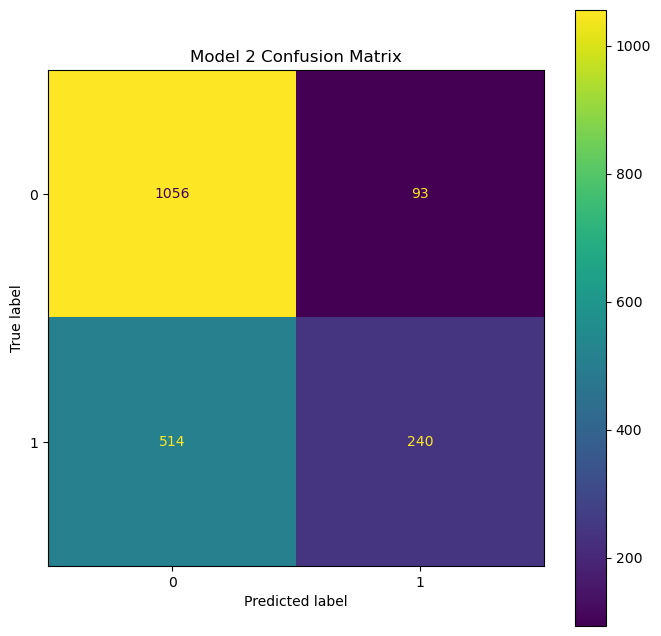

In [82]:
# plotting confusion matrix

fig, ax = plt.subplots(figsize = (8, 8))
ax.set_title("Model 2 Confusion Matrix")
plot_confusion_matrix(pipe2, X_test, y_test, ax = ax)
plt.show();

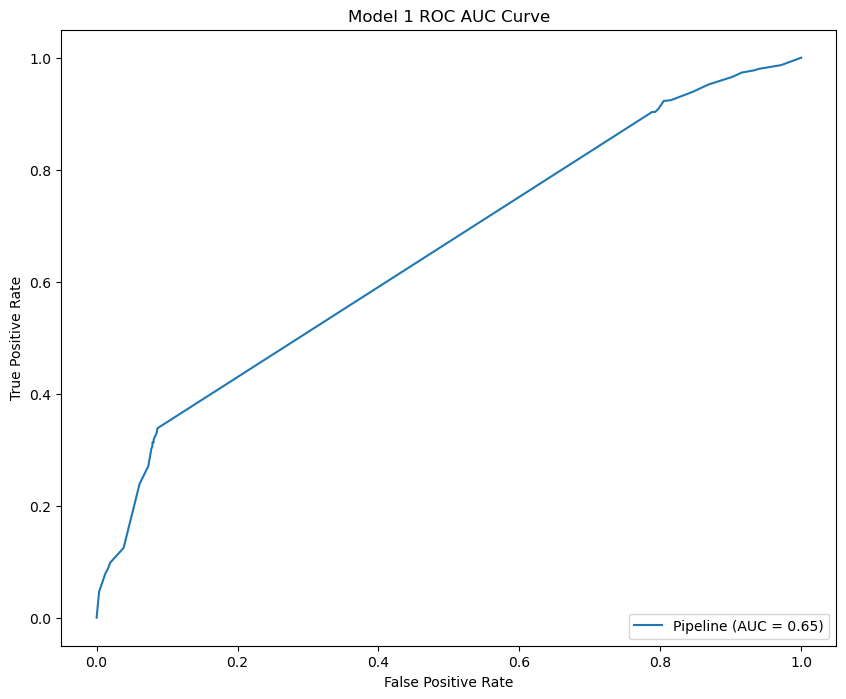

In [83]:
# plotting the AUC Curve 

fig, ax = plt.subplots(figsize = (10, 8))
plot_roc_curve(pipe2, X_test, y_test, ax = ax)
ax.set_title("Model 1 ROC AUC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show();

## K Nearest Neighbors

In [84]:
pipe3 = Pipeline([
    ("vectorizer", CountVectorizer()), 
    ("smote", SMOTE()),
    ("knn", KNeighborsClassifier(n_neighbors = 3, p = 2))
])
pipe3

Pipeline(steps=[('vectorizer', CountVectorizer()), ('smote', SMOTE()),
                ('knn', KNeighborsClassifier(n_neighbors=3))])

In [85]:
# parameter grid
# grid = [{
#     "knn__n_neighbors": [3, 5, 7, 9],
#     "knn__p": [1, 2, 3]
# }]

# Grid Search
# gs_pipe3 = GridSearchCV(estimator = pipe3, param_grid = grid, scoring = "accuracy", cv = 3)

# gs_pipe3.fit(X_train, y_train)

# best params
# gs_pipe3.best_params_

In [86]:
# fit train set
pipe3.fit(X_train, y_train)

# prediction
pipe3_y_pred = pipe3.predict(X_test)

print("Model 3 Classification Report:", classification_report(y_test, pipe3_y_pred))

Model 3 Classification Report:               precision    recall  f1-score   support

           0       0.60      0.01      0.02      1149
           1       0.40      0.99      0.57       754

    accuracy                           0.40      1903
   macro avg       0.50      0.50      0.29      1903
weighted avg       0.52      0.40      0.23      1903



## Random Forest

In [87]:
pipe4 = Pipeline([
    ("vectorizer", CountVectorizer()),
    ("smote", SMOTE()), 
    ("rfc", RandomForestClassifier(criterion = "gini", max_depth = 15, min_samples_leaf = 5, n_estimators = 200))
])
pipe4

Pipeline(steps=[('vectorizer', CountVectorizer()), ('smote', SMOTE()),
                ('rfc',
                 RandomForestClassifier(max_depth=15, min_samples_leaf=5,
                                        n_estimators=200))])

In [88]:
# parameter grid
# grid = [{
#     "rfc__criterion": ["gini", "entropy"], 
#     "rfc__max_depth": [5, 8, 12, 15], 
#     "rfc__n_estimators": [50, 150, 200],
#     "rfc__min_samples_leaf": [2, 5, 20, 50]
# }]

# Grid Search
# gs_pipe4 = GridSearchCV(estimator = pipe4, param_grid = grid, scoring = "accuracy", cv = 3)

# gs_pipe4.fit(X_train, y_train)

# best params
# gs_pipe4.best_params_

In [89]:
# fit train set

pipe4.fit(X_train, y_train)

# predict

pipe4_y_pred = pipe4.predict(X_test)

print("Model 4 Classification Report: \n", classification_report(y_test, pipe4_y_pred))

Model 4 Classification Report: 
               precision    recall  f1-score   support

           0       0.75      0.73      0.74      1149
           1       0.60      0.64      0.62       754

    accuracy                           0.69      1903
   macro avg       0.68      0.68      0.68      1903
weighted avg       0.69      0.69      0.69      1903



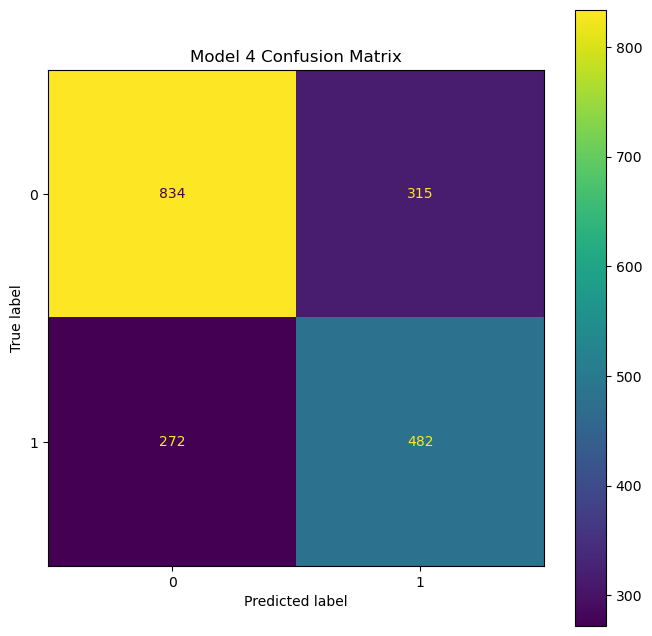

In [90]:
# plotting confusion matrix

fig, ax = plt.subplots(figsize = (8, 8))
ax.set_title("Model 4 Confusion Matrix")
plot_confusion_matrix(pipe4, X_test, y_test, ax = ax)
plt.show();

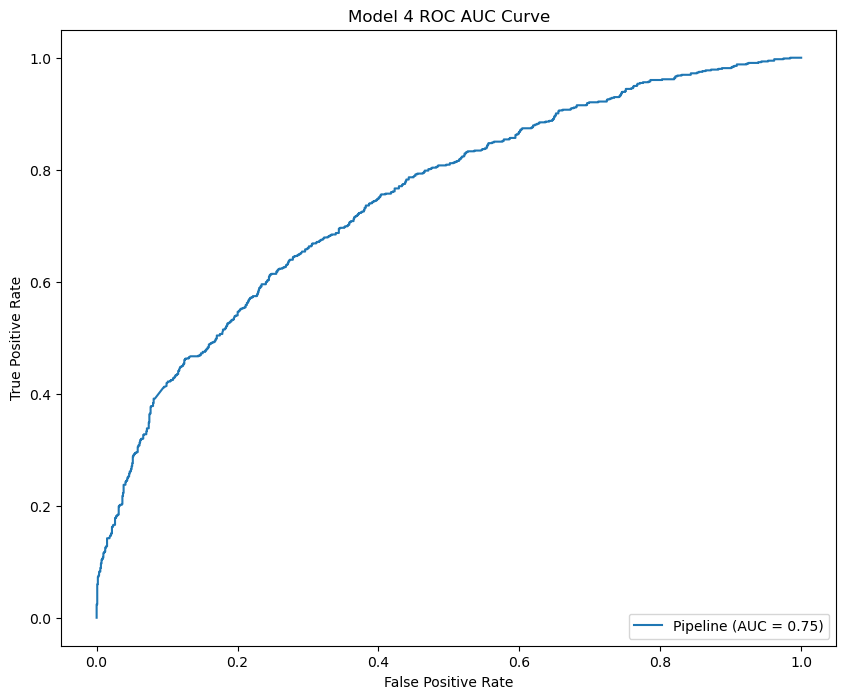

In [91]:
# plotting the AUC Curve 

fig, ax = plt.subplots(figsize = (10, 8))
plot_roc_curve(pipe4, X_test, y_test, ax = ax)
ax.set_title("Model 4 ROC AUC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show();

## XGBOOST

In [92]:
pipe5 = Pipeline([
    ("vectorizer", CountVectorizer()), 
    ("smote", SMOTE()), 
    ("xgb", XGBClassifier(random_state = 42, gamma = 1.5, learning_rate = 0.2, max_depth = 10, min_child_weight = 1, n_estimators = 75))
])
pipe5

Pipeline(steps=[('vectorizer', CountVectorizer()), ('smote', SMOTE()),
                ('xgb',
                 XGBClassifier(base_score=None, booster=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, enable_categorical=False,
                               gamma=1.5, gpu_id=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.2,
                               max_delta_step=None, max_depth=10,
                               min_child_weight=1, missing=nan,
                               monotone_constraints=None, n_estimators=75,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=42, reg_alpha=None,
                               reg_lambda=None, scale_pos_weight=None,
                               subsample=None, tree_method=None,
                               validate

In [93]:
# parameter grid
# grid = [{
#     "xgb__gamma": [1, 1.5, 2, 2.5], 
#     "xgb__learning_rate": [0.2, 0.4, 0.5], 
#     "xgb__max_depth": [9, 10, 11, 12],
#     "xgb__min_child_weight": [1, 2, 3], 
#     "xgb__n_estimators": [50, 75, 100]
# }]

# grid search
# gs_pipe5 = GridSearchCV(estimator = pipe5, param_grid = grid, scoring = "accuracy", cv = 3)

# gs_pipe5.fit(X_train, y_train)

# best params
# gs_pipe5.best_params_

In [94]:
# fit train set 

pipe5.fit(X_train, y_train)

# prediction 
pipe5_y_pred = pipe5.predict(X_test)

print("Model 5 Classification Report: \n", classification_report(y_test, pipe5_y_pred))

[16:05:44] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Model 5 Classification Report: 
               precision    recall  f1-score   support

           0       0.72      0.84      0.78      1149
           1       0.68      0.50      0.58       754

    accuracy                           0.71      1903
   macro avg       0.70      0.67      0.68      1903
weighted avg       0.70      0.71      0.70      1903



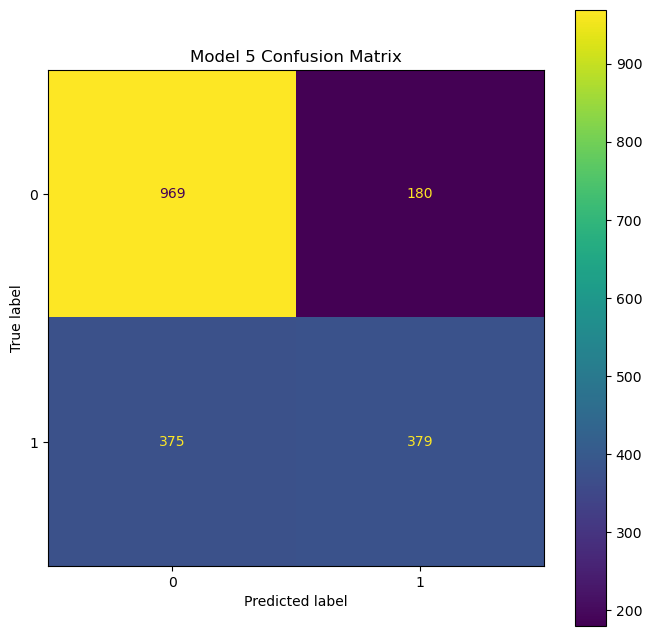

In [95]:
# plotting confusion matrix

fig, ax = plt.subplots(figsize = (8, 8))
ax.set_title("Model 5 Confusion Matrix")
plot_confusion_matrix(pipe5, X_test, y_test, ax = ax)
plt.show();

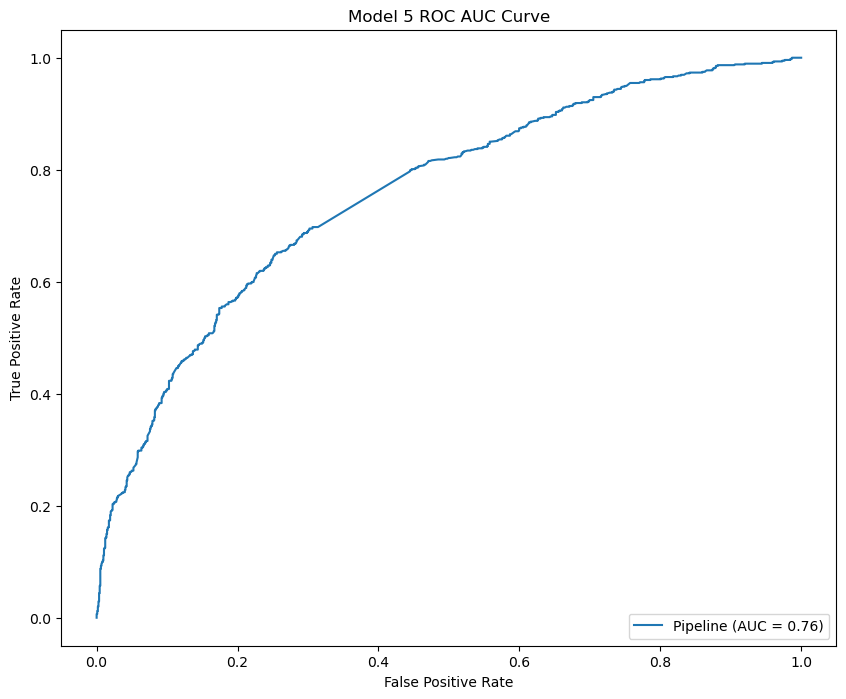

In [96]:
# plotting the AUC Curve 

fig, ax = plt.subplots(figsize = (10, 8))
plot_roc_curve(pipe5, X_test, y_test, ax = ax)
ax.set_title("Model 5 ROC AUC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show();

## Ensemble Method - Stacking # 1

In [97]:
estimators = [
    ('multinb', MultinomialNB(alpha = 0.5,
                              fit_prior = False)),
    ('xgb', XGBClassifier(random_state = 51,
                          gamma = 5,
                          learning_rate = 0.2,
                          max_depth = 7,
                          min_child_weight = 10,
                          n_estimators = 200))
]

In [98]:
stacking = StackingClassifier(estimators)

In [99]:
pipe6 = Pipeline([
    ("vectorizer", CountVectorizer()), 
    ("smote", SMOTE()), 
    ("ensemble", stacking)
])
pipe6

Pipeline(steps=[('vectorizer', CountVectorizer()), ('smote', SMOTE()),
                ('ensemble',
                 StackingClassifier(estimators=[('multinb',
                                                 MultinomialNB(alpha=0.5,
                                                               fit_prior=False)),
                                                ('xgb',
                                                 XGBClassifier(base_score=None,
                                                               booster=None,
                                                               colsample_bylevel=None,
                                                               colsample_bynode=None,
                                                               colsample_bytree=None,
                                                               enable_categorical=False,
                                                               gamma=5,
                                                   

In [100]:
pipe6.fit(X_train, y_train)

[16:05:45] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:05:46] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:05:46] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:05:46] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

Pipeline(steps=[('vectorizer', CountVectorizer()), ('smote', SMOTE()),
                ('ensemble',
                 StackingClassifier(estimators=[('multinb',
                                                 MultinomialNB(alpha=0.5,
                                                               fit_prior=False)),
                                                ('xgb',
                                                 XGBClassifier(base_score=None,
                                                               booster=None,
                                                               colsample_bylevel=None,
                                                               colsample_bynode=None,
                                                               colsample_bytree=None,
                                                               enable_categorical=False,
                                                               gamma=5,
                                                   

In [101]:
pipe6_y_pred = pipe6.predict(X_test)

print("Model 6 Classification Report: \n", classification_report(y_test, pipe6_y_pred))

Model 6 Classification Report: 
               precision    recall  f1-score   support

           0       0.75      0.82      0.78      1149
           1       0.67      0.58      0.62       754

    accuracy                           0.72      1903
   macro avg       0.71      0.70      0.70      1903
weighted avg       0.72      0.72      0.72      1903



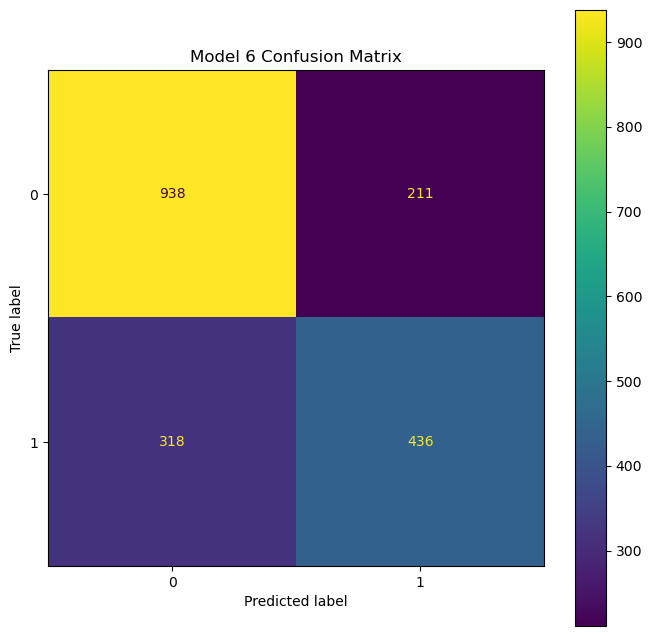

In [102]:
# plotting confusion matrix

fig, ax = plt.subplots(figsize = (8, 8))
ax.set_title("Model 6 Confusion Matrix")
plot_confusion_matrix(pipe6, X_test, y_test, ax = ax)
plt.show();

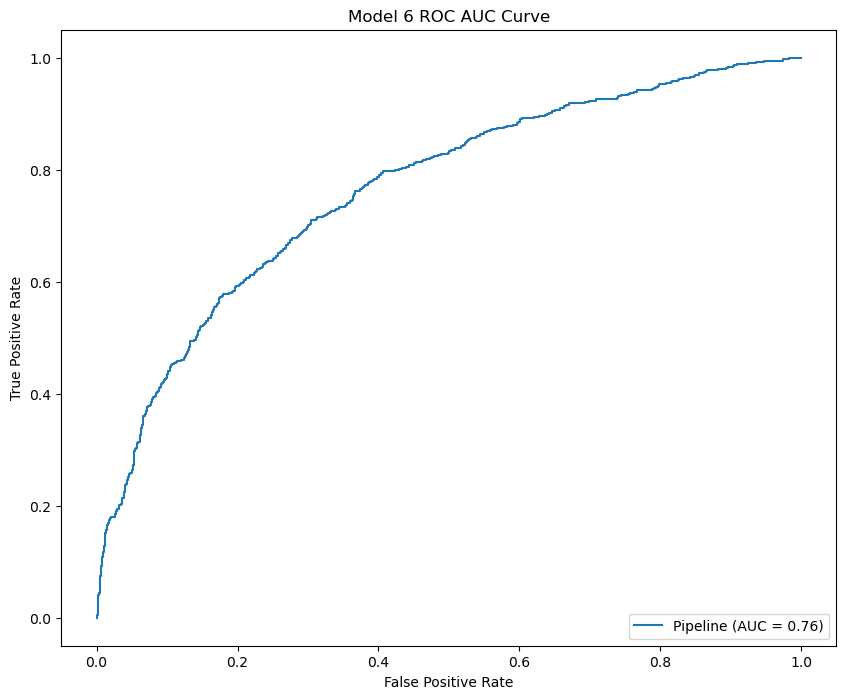

In [103]:
# plotting the AUC Curve 

fig, ax = plt.subplots(figsize = (10, 8))
plot_roc_curve(pipe6, X_test, y_test, ax = ax)
ax.set_title("Model 6 ROC AUC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show();

## Ensemble Method - Stacking # 2

In [104]:
estimators = [
    ('multinb', MultinomialNB(alpha = 0.5,
                              fit_prior = False)),
    ('rcf', RandomForestClassifier(criterion = "gini",
                                   max_depth = 15, 
                                   min_samples_leaf = 5,
                                   n_estimators = 200))
]

In [105]:
stacking1 = StackingClassifier(estimators)

In [106]:
pipe7 = Pipeline([
    ("vectorizer", CountVectorizer()), 
    ("smote", SMOTE()), 
    ("ensemble", stacking1)
])
pipe7

Pipeline(steps=[('vectorizer', CountVectorizer()), ('smote', SMOTE()),
                ('ensemble',
                 StackingClassifier(estimators=[('multinb',
                                                 MultinomialNB(alpha=0.5,
                                                               fit_prior=False)),
                                                ('rcf',
                                                 RandomForestClassifier(max_depth=15,
                                                                        min_samples_leaf=5,
                                                                        n_estimators=200))]))])

In [107]:
# fit train set 
pipe7.fit(X_train, y_train)

# prediction 
pipe7_y_pred = pipe7.predict(X_test)

print("Model 7 Classification Report: \n", classification_report(y_test, pipe7_y_pred))

Model 7 Classification Report: 
               precision    recall  f1-score   support

           0       0.75      0.77      0.76      1149
           1       0.63      0.61      0.62       754

    accuracy                           0.70      1903
   macro avg       0.69      0.69      0.69      1903
weighted avg       0.70      0.70      0.70      1903



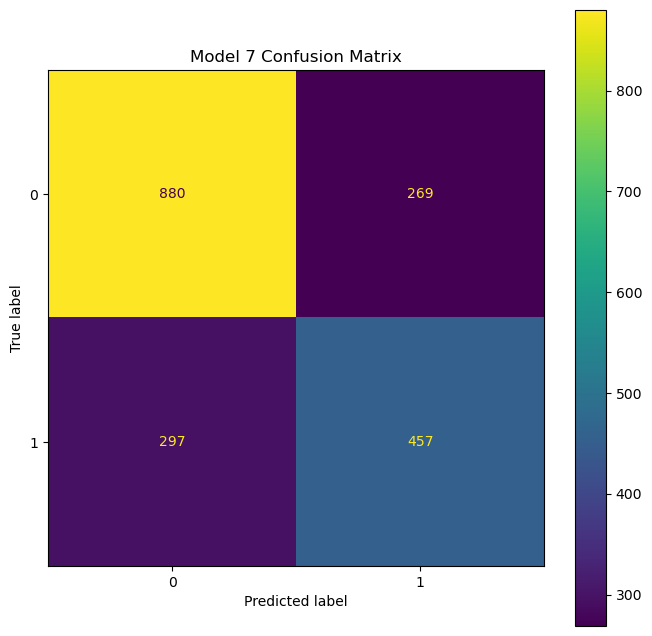

In [108]:
# plotting confusion matrix

fig, ax = plt.subplots(figsize = (8, 8))
ax.set_title("Model 7 Confusion Matrix")
plot_confusion_matrix(pipe7, X_test, y_test, ax = ax)
plt.show();

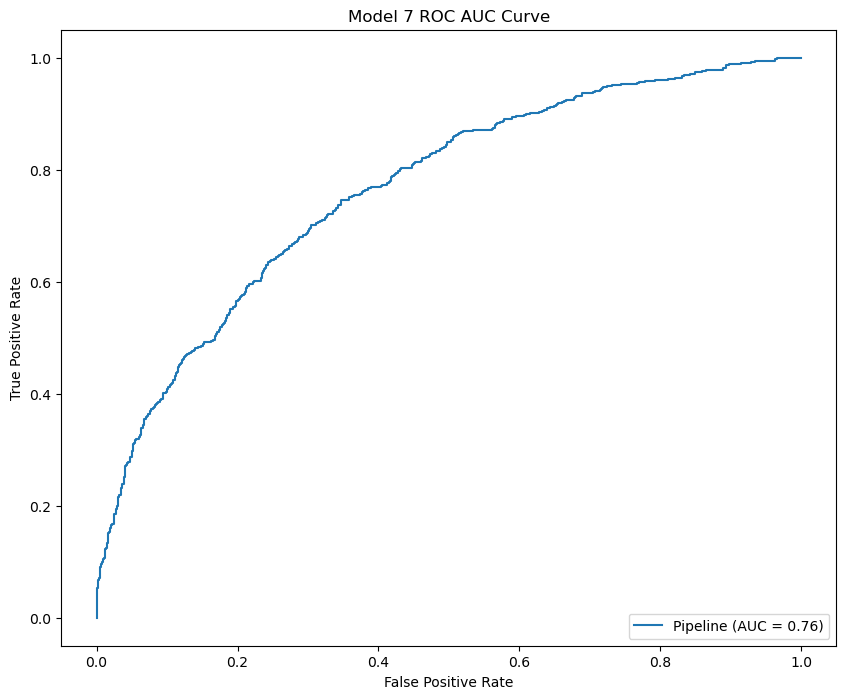

In [109]:
# plotting the AUC Curve 

fig, ax = plt.subplots(figsize = (10, 8))
plot_roc_curve(pipe7, X_test, y_test, ax = ax)
ax.set_title("Model 7 ROC AUC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show();

## Logistic Regression 

In [110]:
pipe8 = Pipeline([
    ("vectorizer", CountVectorizer()), 
    ("smote", SMOTE()), 
    ("logreg", LogisticRegression(C = 1, fit_intercept = False))
])
pipe8

Pipeline(steps=[('vectorizer', CountVectorizer()), ('smote', SMOTE()),
                ('logreg', LogisticRegression())])

In [112]:
# parameter grid
# grid = [{
#     "logreg__C": [1, 2, 3, 4, 5, 6], 
#     "logreg__fit_intercept": [True, False]
# }]

# grid search
# gs_pipe8 = GridSearchCV(estimator = pipe8, param_grid = grid, scoring = "f1", cv = 3)

# gs_pipe8.fit(X_train, y_train)

# best params
# gs_pipe8.best_params_

{'logreg__C': 1, 'logreg__fit_intercept': False}

In [113]:
# fit train set

pipe8.fit(X_train, y_train)

# prediction

pipe8_y_pred = pipe8.predict(X_test)

print("Model 8 Classification Report: \n", classification_report(y_test, pipe8_y_pred))

Model 8 Classification Report: 
               precision    recall  f1-score   support

           0       0.75      0.71      0.73      1149
           1       0.59      0.64      0.62       754

    accuracy                           0.68      1903
   macro avg       0.67      0.67      0.67      1903
weighted avg       0.69      0.68      0.68      1903



Since the dataset is dealing with emotion recognition, I decided to focus on the balance between precision and recall which is the f1 score. We aim to lessen the amount of misclassification between both classes and so I decided to pick my 6th model which is a stacking classifier consisting of multionomial naive bayes and xgboost. It produced the highest f1 score of 78% for the 0 class and 62% for the 1 class. 